# Product Price Predictor: Providing Data-Driven Suggestions for Customers

###  Regression Project Overview
In this project, our agency aims to assist customers in making informed decisions when purchasing XoX, a fictional product, from various makers. The price of XoX plays a crucial role in the purchasing process, and we want to provide accurate price estimations to ensure customer satisfaction. To achieve this, we will develop a machine learning model that can predict the price of a XoX based on relevant features. Additionally, we will provide insights and explanations regarding the predicted price to enhance customer understanding.

### Data Description
A sample of our sales records is available in the "../data/sales.csv" file. This dataset contains information about previous XoX purchases, including various features such as product type, product level, maker, ingredient, cost, weight, dimensions, and more. The target variable, "price," represents the actual price of the product. We will preprocess, clean, analyze, and visualize this data to gain insights into the factors influencing the price.

### Concerns and Considerations
During the development of the machine learning model, we will carefully consider the following aspects:

Overfitting: We will ensure that the model generalizes well to unseen data and does not overfit the training data. Cross-validation and regularization techniques will be employed to mitigate overfitting risks.
Outliers: We will examine the presence of outliers in the data and determine whether they should be treated or removed to prevent them from unduly influencing the model's predictions.
Model Interpretability: While employing complex models for higher accuracy, we will strive to balance interpretability. We want the model to provide accurate predictions while still being understandable to both our customers and us.

### Conclusion
By developing a reliable machine learning model and providing valuable insights and explanations, we aim to improve the accuracy of price estimations for XoX purchases. This will enable us to offer data-driven suggestions to our customers, enhancing their decision-making process. Through careful analysis and interpretation of the model's predictions, we can provide transparent and understandable explanations to our customers, building trust and satisfaction.

If you have any questions or need further clarification, please don't hesitate to reach out to me.

PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

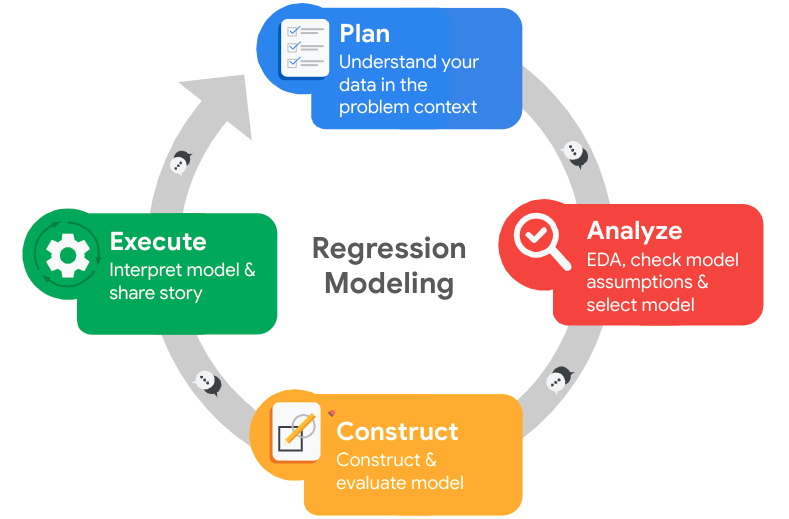

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem

🗒
### Understand the business scenario and problem

We are an agency helping our customers purchase XoX (a made-up product) from various makers. 
**The purpose** of this model is to estimate the price of a XoX before we recommend it to our customers .
  
**The goal** of this model is to accurately predict which makers can provide the lower-price product for a future purchase and provide insights to help us explain the predicted price to our customers (non tech background). 

### Build a classification model

* Data examination
    - Feature columns; missing values; target label
* EDA
    - Univariate analysis on numerical columns and categrical columns
    - Multivariate analysis
    - Feature selection using statistical method and algorithm based method (RFECV)
* Modelling
    - Pipeline
    - XGBoost Regression
* Assignment question answers

## Step 1. Imports

*   Import packages
*   Load dataset

In [98]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

df = pd.read_csv('sales.csv')

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)

### 2.1Gather basic information about the data
 We can start by loading the dataset and examining its structure, dimensions, and the first few rows. This will give us a general overview of the data. 

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cost           2216 non-null   object
 1   price          3186 non-null   object
 2   weight         3193 non-null   object
 3   purchase_date  3196 non-null   object
 4   product_type   3196 non-null   object
 5   product_level  3196 non-null   object
 6   maker          2373 non-null   object
 7   ingredient     2941 non-null   object
 8   height         3197 non-null   object
 9   width          3193 non-null   object
 10  depth          3193 non-null   object
dtypes: object(11)
memory usage: 274.9+ KB


In [53]:
# Display the dimensions of the dataset
print("Dataset dimensions:", df.shape)

Dataset dimensions: (3197, 11)


In [54]:
# Preview the first few rows of the dataset
df.head(5)

cost     price        weight purchase_date product_type product_level  \
0  $333k  $300,492   3 Ton 90 Kg   Dec 19 2008          Q,B      advanced   
1    NaN  $430,570   3 Ton 30 Kg   Sep 10 1997          J,D         basic   
2  $270k  $213,070   3 Ton 40 Kg   Sep 05 2001          J,D         basic   
3    NaN  $229,174   3 Ton 50 Kg   Dec 23 2016            U      advanced   
4   $97k  $122,659  2 Ton 970 Kg   Jan 12 2000          D,R      advanced   

    maker                                    ingredient       height   width  \
0  M14122                             IN732052,IN732053  2.76 meters   97 cm   
1     NaN  IN732054,IN732055,IN732056,IN732057,IN732058  2.67 meters   98 cm   
2     NaN                    IN732054,IN732059,IN732060   3.0 meters   93 cm   
3  M14123                    IN732061,IN732062,IN732063   2.5 meters  102 cm   
4     NaN                    IN732064,IN732065,IN732066  2.47 meters  101 cm   

   depth  
0  26 cm  
1  26 cm  
2  24 cm  
3  27 cm  
4  26 cm

### 2.2 Gather descriptive statistics about the data

In [100]:
# Calculate descriptive statistics
descriptive_stats = df.describe()
print("Descriptive statistics:\n")
print(descriptive_stats.to_string(float_format="{:.2f}".format))

Descriptive statistics:

        cost    price      weight purchase_date product_type product_level   maker ingredient       height  width  depth
count   2216     3186        3193          3196         3196          3196    2373       2941         3197   3193   3193
unique   185     3157         119          1278           64             5     882       2833          161     41     13
top     $66k  $20,061  3 Ton 0 Kg   Oct 05 2001            D      advanced  M14196   IN732638  2.54 meters  99 cm  26 cm
freq     104        2         127             8          485          1323      17          8           63    268    903


### 2.3 Check missing values

In [101]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values:\n")
print(missing_values)

Missing values:

cost             981
price             11
weight             4
purchase_date      1
product_type       1
product_level      1
maker            824
ingredient       256
height             0
width              4
depth              4
dtype: int64


**The target is to predict price, we don't want null target, so we drop it.**

In [102]:
df.dropna(subset = ['price'], inplace = True)

**There are only 3 null value for weight, width, depth after drop price with missing. We choose to drop them because they also with missing in many key featues (cost, price, weight) index 936,1503,2844.**

In [103]:
# Filter the DataFrame for rows with 4 missing values in the "weight" column
rows_with_weight_missing = df[df['weight'].isna()]
print(rows_with_weight_missing)

       cost    price weight purchase_date product_type   product_level  \
936     NaN  $13,966    NaN   Jun 12 2015          N,D    intermediate   
1503    NaN   $4,936    NaN   Jul 15 2015            H  super advanced   
2844  $122k  $55,901    NaN   Jul 27 2012          S,N  super advanced   

       maker                                         ingredient      height  \
936      NaN                                                NaN  nan meters   
1503  M14657  IN733656,IN732217,IN732973,IN732605,IN732086,I...  nan meters   
2844     NaN                IN732438,IN732061,IN732861,IN733229  nan meters   

     width depth  
936    NaN   NaN  
1503   NaN   NaN  
2844   NaN   NaN  


In [104]:
# Drop the row with missing in many key featues (cost, price, weight) index 936,1503,2844
df = df.drop([936,1503,2844])

In [105]:
# Verify the changes
df.isnull().sum()

cost             973
price              0
weight             0
purchase_date      0
product_type       0
product_level      0
maker            819
ingredient       253
height             0
width              0
depth              0
dtype: int64

### Check duplicates


In [106]:
# Check for duplicates
duplicates = df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicate records:", num_duplicates)
print("Dataset dimensions:", df.shape)

Number of duplicate records: 0
Dataset dimensions: (3183, 11)


### Check outliers

In [107]:
raw_data = df.copy()
# I did not clean non-numerical data ('product_type', 'product_level', 'maker', 'ingredient') here
raw_data['price'] = df['price'].map(lambda x: x if type(x) is float else float(x.strip("$").replace(',','')))
raw_data['cost'] = df['cost'].map(lambda x: x if type(x) is float else float(x.strip('$').replace('k','000')))
raw_data['weight'] = df['weight'].map(lambda x: float(x) if type(x) is float else (float(x.strip(" Kg").replace(" Ton ", " ").split()[0]) * 1000 + float(x.strip(" Kg").replace(" Ton ", " ").split()[1])))
raw_data['height'] = df['height'].map(lambda x: x if type(x) is float else float(x.strip('meters')))
raw_data['width'] = df['width'].map(lambda x: x / 100 if isinstance(x, float) else float(x.strip('cm')) / 100)
raw_data['depth'] = df['depth'].map(lambda x: x / 100 if isinstance(x, float) else float(x.strip('cm')) / 100)
raw_data.head()

cost     price  weight purchase_date product_type product_level  \
0  333000.0  300492.0  3090.0   Dec 19 2008          Q,B      advanced   
1       NaN  430570.0  3030.0   Sep 10 1997          J,D         basic   
2  270000.0  213070.0  3040.0   Sep 05 2001          J,D         basic   
3       NaN  229174.0  3050.0   Dec 23 2016            U      advanced   
4   97000.0  122659.0  2970.0   Jan 12 2000          D,R      advanced   

    maker                                    ingredient  height  width  depth  
0  M14122                             IN732052,IN732053    2.76   0.97   0.26  
1     NaN  IN732054,IN732055,IN732056,IN732057,IN732058    2.67   0.98   0.26  
2     NaN                    IN732054,IN732059,IN732060    3.00   0.93   0.24  
3  M14123                    IN732061,IN732062,IN732063    2.50   1.02   0.27  
4     NaN                    IN732064,IN732065,IN732066    2.47   1.01   0.26

In [108]:
# Create a new DataFrame with selected columns from raw_data, keeping the raw_data for cross-checking
clean_data = raw_data.copy()

In [109]:
# Count nemeric and categorical features
categorical_columns = ['product_type', 'product_level', 'maker', 'ingredient']
numerical_columns = ['cost','price','weight','height','width','depth']
date_col = ['purchase_date']
print('categorical_columns : {} \n\
numerical_columns : {}'.format(len(categorical_columns), len(numerical_columns)))

categorical_columns : 4 
numerical_columns : 6


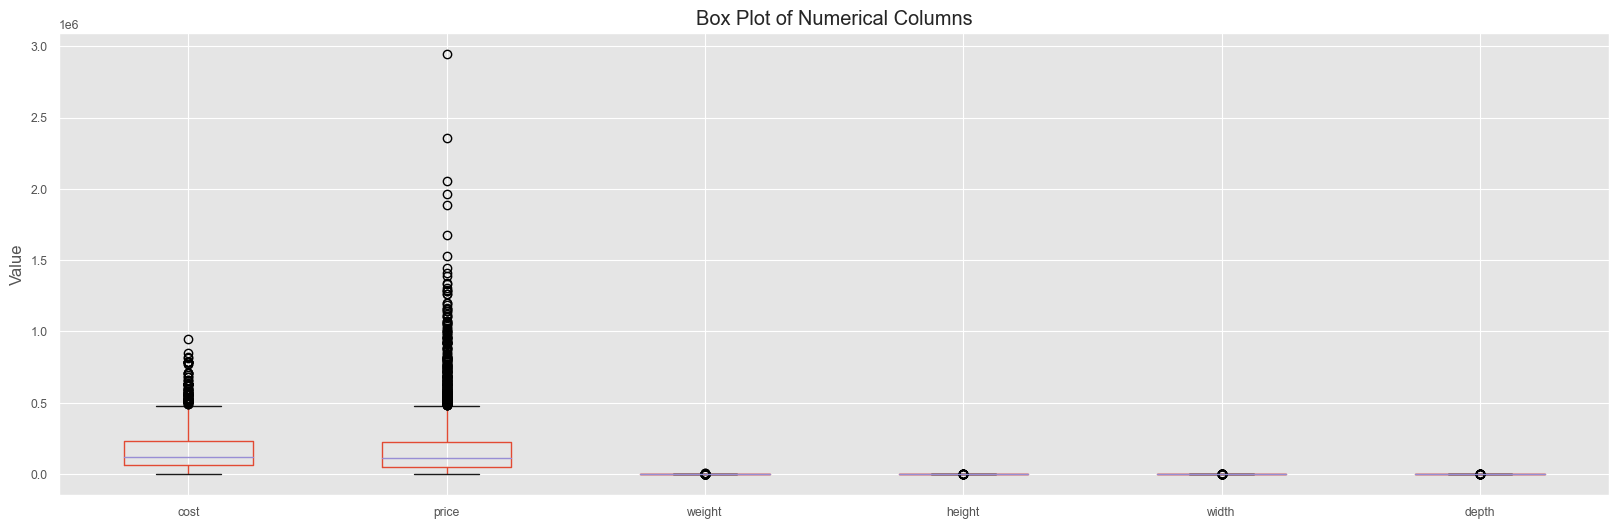

In [110]:
import matplotlib.pyplot as plt
# Select numerical columns for outlier detection

# Create box plots for numerical columns
plt.figure(figsize=(20, 6))
clean_data[numerical_columns].boxplot()
plt.title('Box Plot of Numerical Columns')
plt.ylabel('Value')
plt.show()

1. Z_score method
2. IQR method: Calculate the interquartile range (IQR) for the column and define outliers as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles, respectively.

In [111]:
# Determine the number of rows containing outliers
column = clean_data['price']  # Replace 'price' with the actual column name

Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (column < lower_bound) | (column > upper_bound)
num_outliers = sum(outliers)
print("Number of outliers in price:", num_outliers)

Number of outliers in price: 246


In [112]:
# Determine the number of rows containing outliers
column = clean_data['cost']  # Replace 'price' with the actual column name

Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (column < lower_bound) | (column > upper_bound)
num_outliers = sum(outliers)
print("Number of outliers in cost:", num_outliers)

Number of outliers in cost: 98


### Quick check on categorical columns

In [114]:
# top 5 rows of categorical columns
df_cat_col = clean_data[categorical_columns]
df_cat_col.head()

product_type product_level   maker  \
0          Q,B      advanced  M14122   
1          J,D         basic     NaN   
2          J,D         basic     NaN   
3            U      advanced  M14123   
4          D,R      advanced     NaN   

                                     ingredient  
0                             IN732052,IN732053  
1  IN732054,IN732055,IN732056,IN732057,IN732058  
2                    IN732054,IN732059,IN732060  
3                    IN732061,IN732062,IN732063  
4                    IN732064,IN732065,IN732066

In [115]:
df_cat_col.describe(include=['object'])

product_type product_level   maker ingredient
count          3183          3183    2364       2930
unique           64             5     879       2822
top               D      advanced  M14196   IN732638
freq            485          1320      17          8

In [116]:
# check which columns have constant value. Those columns are not useful for modeling
idx = np.where(df_cat_col.nunique()<2)
drop_constant = df_cat_col.columns[idx].tolist()
print('There are {} constant columns:'.format(len(drop_constant)))
print(drop_constant)

#drop_constant in cat_col
cat_col = [x for x in cat_col if x not in drop_constant]
print("="*60)
print('There are {} categorical columns:'.format(len(cat_col)))

There are 0 constant columns:
[]
There are 4 categorical columns:


**Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use**

We have identified a considerable number of outliers in the 'cost' (99 outliers) and 'price' (245 outliers) columns. Here are a few models that are known to be robust to outliers (less sensitive to outliers):

* **Random Forest**: Random Forest is an ensemble learning method that combines multiple decision trees. It is known for its robustness to outliers due to the averaging effect of multiple trees, which helps reduce the impact of individual outliers.

* **Gradient Boosting**: Gradient Boosting is another ensemble learning technique that combines multiple weak learners, usually decision trees, to create a strong predictive model. Similar to Random Forest, Gradient Boosting can handle outliers relatively well.

* **Support Vector Machines (SVM)**: SVMs are powerful and flexible models that can handle outliers effectively by using a kernel trick to map the data into a higher-dimensional space. SVMs find a decision boundary that maximizes the margin between classes, which can be less affected by individual outliers.

* **Neural Networks**: Neural networks can be relatively robust to outliers if designed properly. Adding regularization techniques, such as L1 or L2 regularization, can help mitigate the impact of outliers in the model.

It is worth noting that even though these models are generally robust to outliers, it is still advisable to preprocess your data carefully and consider the specific characteristics of your dataset. Outlier removal or transformation techniques, such as Winsorization or log-transform, could still be considered based on the nature of the outliers and their impact on the data distribution.

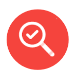
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
  * Cost and Price: The cost and price variables represent the financial aspects of the products. In general, we can expect a positive relationship between cost and price, as higher costs usually lead to higher prices. However, in the given data, some entries have missing values (NaN) for cost, which makes it difficult to assess the relationship accurately.

  * Weight and Product Type/Product Level: The weight variable indicates the weight of the products. We can examine how the weight varies across different product types and levels to understand any potential relationships. 

  * Purchase Date and Product Type/Product Level: The purchase date variable represents the date when the products were purchased. We can explore if there are any patterns or trends between the purchase date and the product type or level. 

  * Maker and Ingredient: The maker and ingredient variables describe the manufacturer and the ingredients used in the products, respectively. We can examine the relationship between different makers and the corresponding ingredients to determine if there are any consistent patterns or associations. However, in the given data, some entries have missing values (NaN) for the maker, which limits our ability to analyze this relationship comprehensively.

  * Size (Height, Width, Depth): The height, width, and depth variables represent the dimensions of the products. We can explore the relationships between these size variables to understand the product dimensions better. 


## Step 2. Data Exploration (Continue EDA)

### Data visualizations
Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

### Compare the three transformation methods: Dummy, Frequency, and Ordinal Transformer, for categorical variables.

**Dummy Transformer (One-Hot Encoding):**

Each category of the categorical variable is represented by a binary column.
The binary column indicates the presence or absence of a category in each observation.
Suitable when there is no ordinal relationship or meaningful order among the categories.
**Pros**:
Preserves the distinctness of categories.
Works well for models that require numerical input.
Avoids introducing false ordinal relationships.
**Cons**:
Increases the dimensionality of the dataset.
Can be memory-intensive for large datasets.

**Frequency Transformer:**
Replaces each category with its frequency (count) in the dataset.
Suitable when the ordering or frequency of the categories conveys meaningful information.
**Pros**:
Preserves the ordinal nature of the variable.
Reduces dimensionality compared to dummy encoding.
Suitable for models that can handle ordinal variables.
**Cons**:
Ignores the distinctness of categories.
May introduce an artificial ordinal relationship.

**Ordinal Transformer:**
Assigns a numerical value to each category based on a defined order or specified mapping.
Suitable when there is a clear ordinal relationship or meaningful order among the categories.
**Pros**:
Preserves the ordinal nature of the variable.
Captures the meaningful progression of categories.
Provides flexibility to specify the mapping or order explicitly.
**Cons**:
Requires careful consideration of the assigned numerical values to reflect the true order.
May introduce a linear relationship that may not exist in reality.
The choice among these transformation methods depends on the specific characteristics of your categorical variable, the underlying relationships between categories, and the modeling techniques you plan to use. 

*It is important to consider the nature of the data, the domain knowledge, and the research objectives when selecting the appropriate transformation method.

In [121]:
# Convert 'purchase_date' column to datetime
clean_data['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Extract year, month, weekday, and weekend
clean_data['year'] = clean_data['purchase_date'].dt.year.astype('Int64')
clean_data['month'] = clean_data['purchase_date'].dt.month.astype('Int64')
clean_data['weekday'] = clean_data['purchase_date'].dt.weekday.astype('Int64')
clean_data['is_weekend'] = clean_data['weekday'].isin([5, 6])  # 5 and 6 represent Saturday and Sunday, respectively

In [122]:
# As product_type, product_level, maker, and ingredient all contain nan, I rename nan as unknown
unique_product_types = clean_data['product_type'].unique()
unique_product_level = clean_data['product_level'].unique()
unique_maker = clean_data['maker'].unique()
unique_ingredient = clean_data['ingredient'].unique()

print(unique_product_types)
print(unique_product_level)
print(unique_maker)
print(unique_ingredient)

['Q,B' 'J,D' 'U' 'D,R' 'H' 'S' 'B,A' 'K,D' 'N' 'U,A' 'D' 'H,A' 'G' 'D,A'
 'T,H' 'D,H' 'F' 'A' 'Q,A' 'W' 'F,D' 'R' 'P,H' 'C' 'Q,H' 'U,H' 'J' 'N,D'
 'F,H' 'Q,D' 'V,H' 'W,D' 'S,N' 'N,U' 'F,U' 'P,P' 'S,A' 'U,R' 'J,B' 'I,M'
 'B,D' 'H,M' 'S,U' 'K,H' 'S,B' 'T,D' 'F,A' 'K' 'V' 'N,A' 'B' 'R,V' 'E'
 'U,D' 'L,A' 'L' 'K,A' 'S,D' 'Q,N' 'T,A' 'O' 'B,R' 'N,L' 'K,S']
['advanced' 'basic' 'super advanced' 'intermediate' 'unrated']
['M14122' nan 'M14123' 'M14124' 'M14125' 'M14126' 'M14127' 'M14128'
 'M14129' 'M14130' 'M14131' 'M14132' 'M14133' 'M14134,M14135' 'M14136'
 'M14137' 'M14138,M14139' 'M14140' 'M14141' 'M14142' 'M14143' 'M14144'
 'M14145' 'M14146' 'M14147' 'M14148' 'M14149' 'M14150' 'M14151' 'M14152'
 'M14153' 'M14154' 'M14155' 'M14156' 'M14157' 'M14158' 'M14159' 'M14160'
 'M14161' 'M14162' 'M14163' 'M14164' 'M14165' 'M14166' 'M14167' 'M14168'
 'M14169' 'M14170' 'M14171' 'M14172' 'M14173' 'M14174' 'M14175' 'M14176'
 'M14177' 'M14178' 'M14179' 'M14180' 'M14181' 'M14182' 'M14183' 'M14184'
 'M14185

In [123]:
# rename missing values of product_type, product_level, maker, and ingredient, I rename nan as unknown
clean_data["product_type"].fillna("unknown_product_type", inplace=True)
clean_data["product_level"].fillna("unknown_product_level", inplace=True)
clean_data["maker"].fillna("unknown_maker", inplace=True)
clean_data["ingredient"].fillna("unknown_ingredient", inplace=True)
clean_data.head()
#By using inplace=True parameter, modifications will be made directly to the raw_data DataFrame without creating new variables.

cost     price  weight purchase_date product_type product_level  \
0  333000.0  300492.0  3090.0    2008-12-19          Q,B      advanced   
1       NaN  430570.0  3030.0    1997-09-10          J,D         basic   
2  270000.0  213070.0  3040.0    2001-09-05          J,D         basic   
3       NaN  229174.0  3050.0    2016-12-23            U      advanced   
4   97000.0  122659.0  2970.0    2000-01-12          D,R      advanced   

           maker                                    ingredient  height  width  \
0         M14122                             IN732052,IN732053    2.76   0.97   
1  unknown_maker  IN732054,IN732055,IN732056,IN732057,IN732058    2.67   0.98   
2  unknown_maker                    IN732054,IN732059,IN732060    3.00   0.93   
3         M14123                    IN732061,IN732062,IN732063    2.50   1.02   
4  unknown_maker                    IN732064,IN732065,IN732066    2.47   1.01   

   depth  year  month  weekday  is_weekend  
0   0.26  2008     12        4       False  
1   0.26  1997      9        2       False  
2   0.24  2001      9        2       False  
3   0.27  2016     12        4       False  
4   0.26  2000      1        2       False

In [124]:
print(raw_data.shape)

(3183, 11)


## Data Mining

There are many categories of ingredient information, but we can assume that when the number of ingredients used increases, the price decreases, create a "ingredient_number" column, and calculate the correlation coefficient.

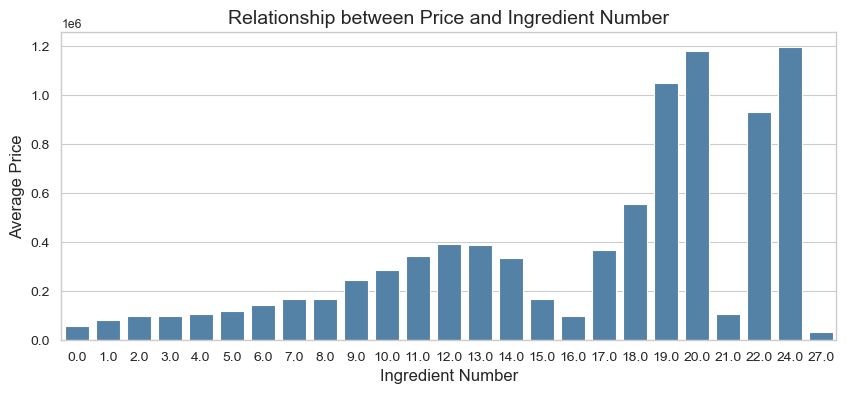

In [125]:
# Create a new column 'ingredient_number' to represent the number of ingredients
raw_data['ingredient_number'] = raw_data['ingredient'].str.count(',') + 1

# Replace missing values in 'ingredient_number' with 0
raw_data['ingredient_number'] = raw_data['ingredient_number'].fillna(0)

# Calculate the average price for each ingredient_number category
avg_price = raw_data.groupby('ingredient_number')['price'].median()

# Set the style and context for seaborn
sns.set(style="whitegrid", context="paper")

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 4))

# Create the bar chart
sns.barplot(x=avg_price.index, y=avg_price.values, color='steelblue', ax=ax)
ax.set_xlabel('Ingredient Number', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)
ax.set_title('Relationship between Price and Ingredient Number', fontsize=14)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()

**If there is an increasing trend in the price with the number of ingredients, it suggests that products with a higher number of ingredients tend to have higher prices. 
This observation aligns with the common perception that products with more complex formulations or a larger number of ingredients might be more expensive due to factors such as research and development costs, sourcing of rare or high-quality ingredients, production complexity, and market demand.** 

In [126]:
clean_data['product_level'].unique()

array(['advanced', 'basic', 'super advanced', 'intermediate', 'unrated'],
      dtype=object)

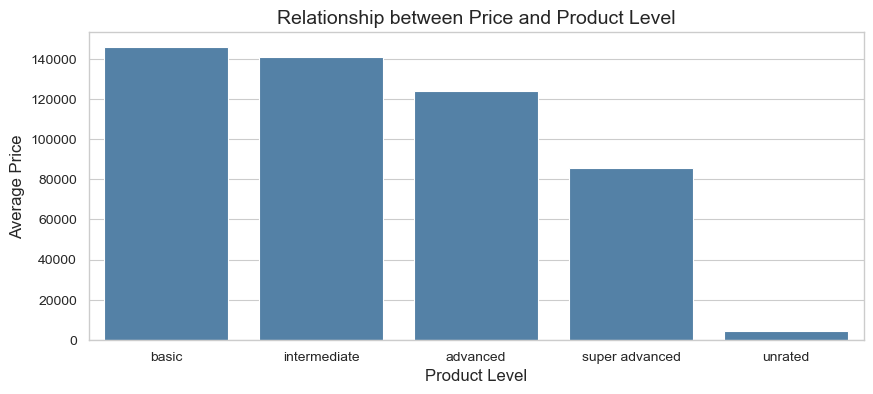

In [152]:
order = ['basic', 'intermediate', 'advanced', 'super advanced', 'unrated']
clean_data['product_level'] = pd.Categorical(clean_data['product_level'], categories=order, ordered=True)

# Calculate the average price for each product_level category
avg_price = clean_data.groupby('product_level')['price'].median()

# Set the style and context for seaborn
sns.set(style="whitegrid", context="paper")

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 4))

# Create the bar chart
sns.barplot(x=avg_price.index, y=avg_price.values, color='steelblue', ax=ax)
ax.set_xlabel('Product Level', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)
ax.set_title('Relationship between Price and Product Level', fontsize=14)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()

**It suggests that there may be a relationship or trend in the data where higher product levels tend to have lower prices. This could be due to several reasons, such as:**

* Market dynamics: In certain markets, products with higher levels of sophistication or advanced features may have higher production costs, resulting in higher prices. However, if there is strong competition or market saturation at higher product levels, it could lead to lower prices as companies try to attract customers.

* Demand and perceived value: The demand and perceived value of products can vary based on their product levels. If customers perceive basic or intermediate products as meeting their needs and offering sufficient value, they may be willing to pay higher prices. On the other hand, for super advanced products, the market demand might be limited, resulting in lower prices.

* Product differentiation: Higher product levels may be associated with more advanced features, innovation, or unique characteristics that differentiate them from lower-level products. If there is less differentiation or innovation at higher levels, it could lead to lower prices.

* Competitive pricing: Competitors in the market might adopt aggressive pricing strategies for higher-level products to capture market share or increase sales volume. This competition could drive down the average prices at higher product levels.

In [151]:
clean_data['ingredient_number'] = raw_data['ingredient_number']

# Select the variables of interest
variables_of_interest = ['price', 'cost', 'ingredient_number', 'weight', 'height','width', 'depth', 'year', 'month']

# Subset the dataset to include only the selected variables
data_subset = clean_data[variables_of_interest]

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()
print("Correlation Matrix:")
print(correlation_matrix.to_string(float_format="{:.3f}".format))

Correlation Matrix:
                   price   cost  ingredient_number  weight  height  width  depth   year  month
price              1.000  0.627              0.407   0.296   0.076  0.081  0.084  0.127 -0.077
cost               0.627  1.000              0.381   0.357   0.075  0.121  0.120  0.107 -0.120
ingredient_number  0.407  0.381              1.000   0.309   0.043  0.117  0.116  0.314 -0.024
weight             0.296  0.357              0.309   1.000   0.177  0.353  0.343  0.031  0.043
height             0.076  0.075              0.043   0.177   1.000 -0.851 -0.837 -0.027 -0.009
width              0.081  0.121              0.117   0.353  -0.851  1.000  0.979  0.043  0.034
depth              0.084  0.120              0.116   0.343  -0.837  0.979  1.000  0.041  0.036
year               0.127  0.107              0.314   0.031  -0.027  0.043  0.041  1.000 -0.031
month             -0.077 -0.120             -0.024   0.043  -0.009  0.034  0.036 -0.031  1.000


### Sensitivity analyses 

In [137]:
# Remove rows with missing values (NaN) for correlation_matrix
# Select the variables of interest
variables_of_interest = ['price', 'cost', 'ingredient_number', 'weight', 'height','width', 'depth', 'year', 'month']

# Subset the dataset to include only the selected variables
data_subset = clean_data[variables_of_interest]

# Remove rows with missing values (NaN)
data_subset = data_subset.dropna()

# Calculate the correlation matrix for non-null values
correlation_matrix = data_subset.corr()
print("Correlation Matrix for Completed Cases:")
print(correlation_matrix.to_string(float_format="{:.3f}".format))

Correlation Matrix for Completed Cases:
                   price   cost  ingredient_number  weight  height  width  depth   year  month
price              1.000  0.627              0.395   0.292   0.077  0.082  0.084  0.124 -0.124
cost               0.627  1.000              0.381   0.357   0.075  0.121  0.120  0.107 -0.120
ingredient_number  0.395  0.381              1.000   0.299   0.049  0.108  0.105  0.328 -0.064
weight             0.292  0.357              0.299   1.000   0.181  0.361  0.349  0.021  0.025
height             0.077  0.075              0.049   0.181   1.000 -0.844 -0.832 -0.029 -0.015
width              0.082  0.121              0.108   0.361  -0.844  1.000  0.980  0.041  0.032
depth              0.084  0.120              0.105   0.349  -0.832  0.980  1.000  0.042  0.035
year               0.124  0.107              0.328   0.021  -0.029  0.041  0.042  1.000 -0.049
month             -0.124 -0.120             -0.064   0.025  -0.015  0.032  0.035 -0.049  1.000


In [162]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


**Therefore, I decide to use the multiple imputation to fill missing values in the 'cost' feature is a common approach and can provide a robust estimate, because I will include many other features as well.** Here the regression imputation is overlaped with multiple imputation. 

<AxesSubplot:>

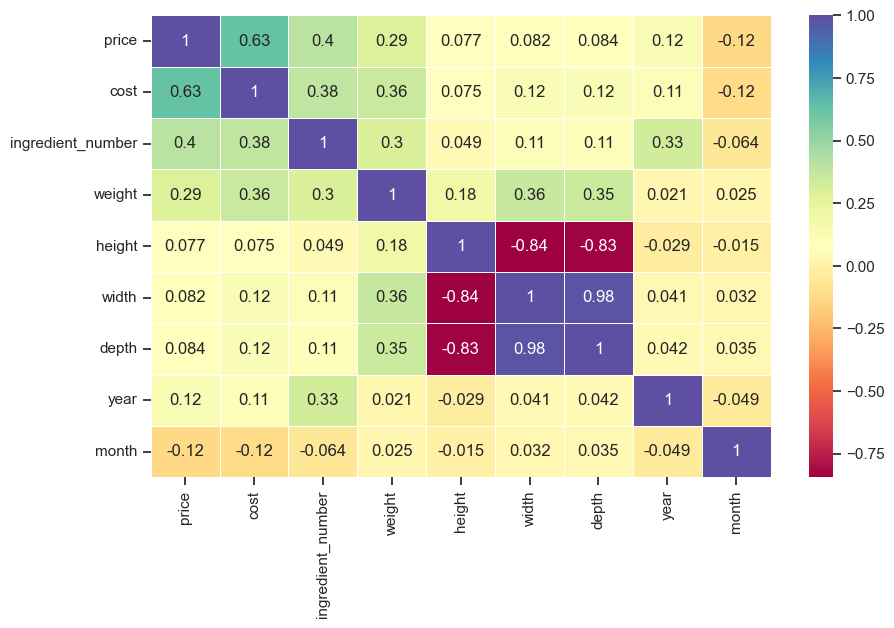

In [160]:
plt.figure(figsize=(10,6))
    
sns.heatmap(data_subset.corr(),annot = True, cmap = 'Spectral',
           lw = 0.5, linecolor = 'white')

In [427]:
clean_data.head()

cost     price  weight purchase_date product_type product_level  \
0  333000.0  300492.0  3090.0    2008-12-19          Q,B      advanced   
1       NaN  430570.0  3030.0    1997-09-10          J,D         basic   
2  270000.0  213070.0  3040.0    2001-09-05          J,D         basic   
3       NaN  229174.0  3050.0    2016-12-23            U      advanced   
4   97000.0  122659.0  2970.0    2000-01-12          D,R      advanced   

           maker                                    ingredient  \
0         M14122                             IN732052,IN732053   
1  unknown_maker  IN732054,IN732055,IN732056,IN732057,IN732058   
2  unknown_maker                    IN732054,IN732059,IN732060   
3         M14123                    IN732061,IN732062,IN732063   
4  unknown_maker                    IN732064,IN732065,IN732066   

   height_in_meters  width_in_meters  depth_in_meters  ingredient_number  \
0              2.76             0.97             0.26                2.0   
1              2.67             0.98             0.26                5.0   
2              3.00             0.93             0.24                3.0   
3              2.50             1.02             0.27                3.0   
4              2.47             1.01             0.26                3.0   

   year  month  weekday  is_weekend  
0  2008     12        4       False  
1  1997      9        2       False  
2  2001      9        2       False  
3  2016     12        4       False  
4  2000      1        2       False

In [140]:
clean_data.isnull().sum()

cost                 973
price                  0
weight                 0
purchase_date          0
product_type           0
product_level          0
maker                  0
ingredient             0
height                 0
width                  0
depth                  0
year                   0
month                  0
weekday                0
is_weekend             0
ingredient_number      0
dtype: int64

In [142]:
clean_data['volume'] = clean_data['height'] * clean_data['width'] * clean_data['depth']
clean_data['volume'] = clean_data['volume'].round(2)

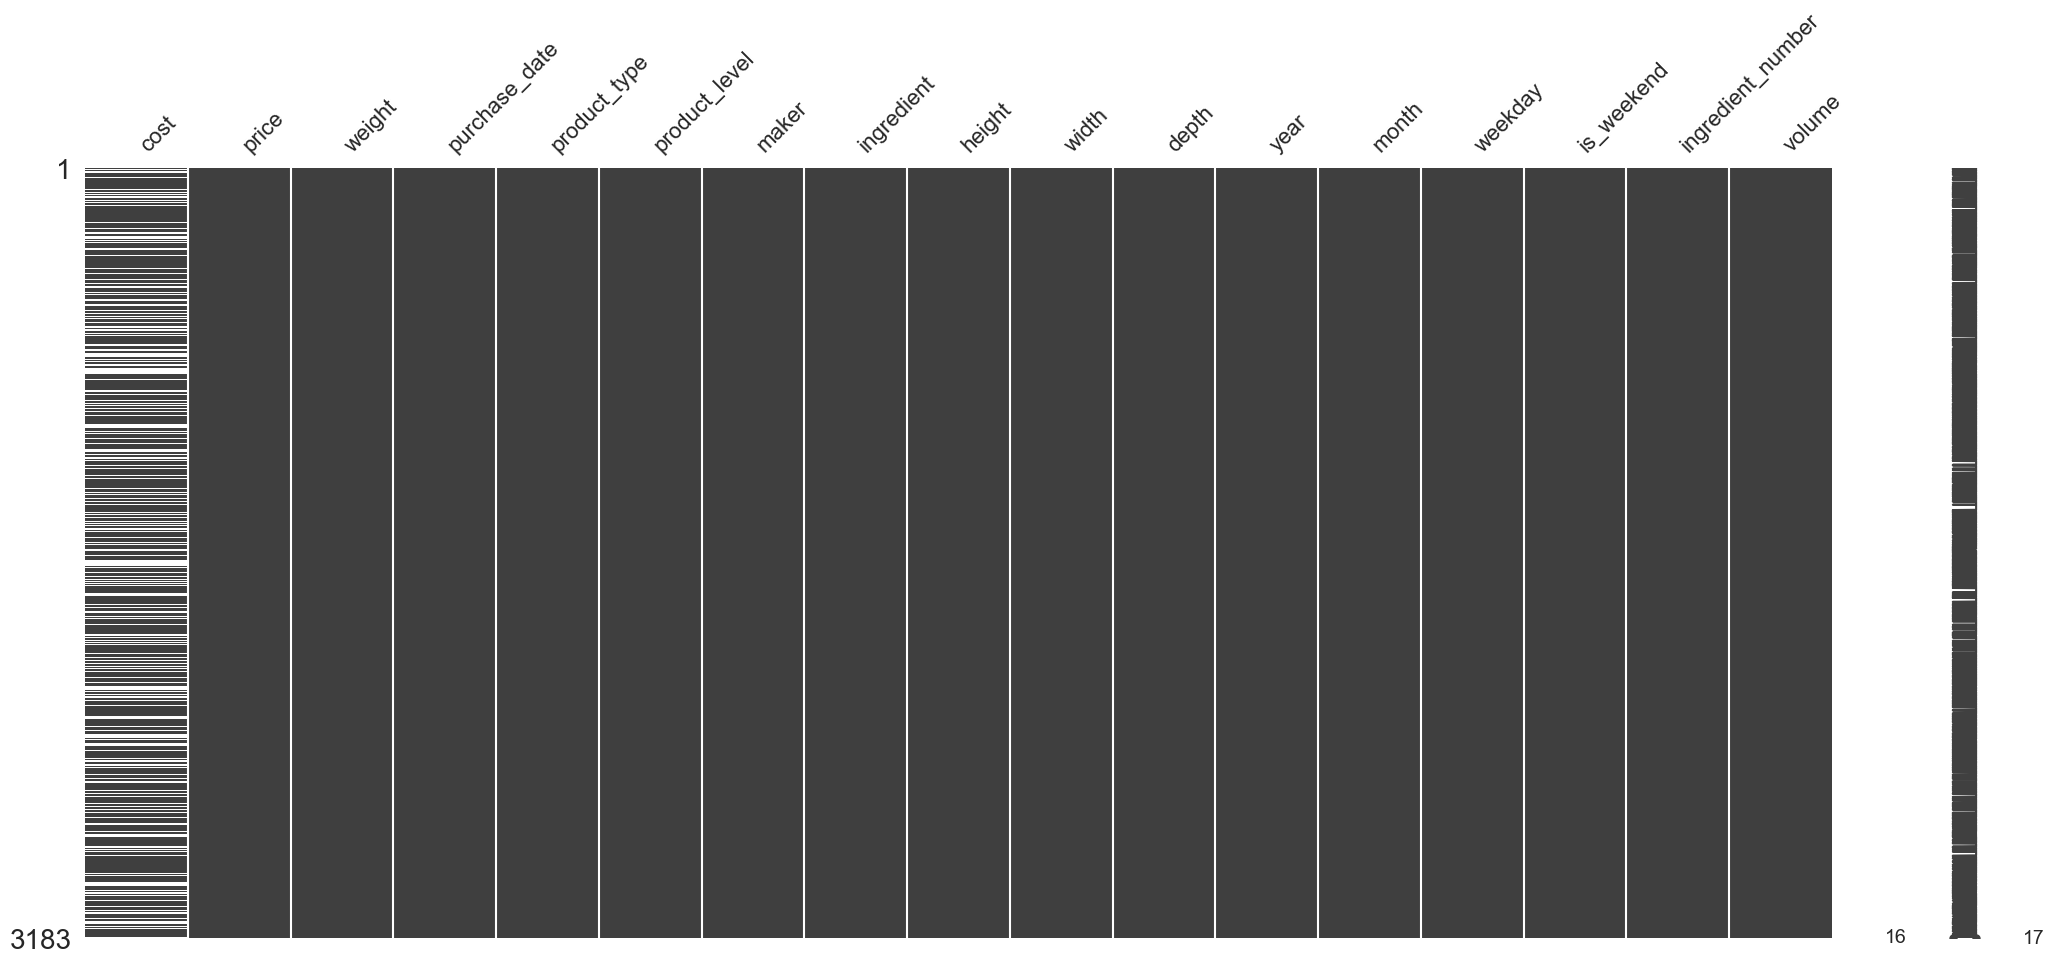

In [164]:
import missingno as msno

msno.matrix(clean_data)
plt.show()

In [170]:
# check if missing in these column is MCAR (missing completely at random)
import sys
from scipy import stats
from scipy.stats import ttest_ind

In [172]:
num_col_with_missing = clean_data.columns[clean_data.isnull().any()].tolist()
num_col_with_missing

# Calculate percentage of missing values for each column and determine MCAR
mcar_cols = []
non_mcar_cols = []
for col in num_col_with_missing:
    missing_percentages = clean_data[col].isnull().sum() / len(clean_data) * 100
    if missing_percentages == 0:
        continue
    elif missing_percentages == 100:
        non_mcar_cols.append(col)
    else:
        p_value = 1.0  # initialize p-value
        # Check MCAR by comparing original column with a column with missing 
        # values imputed using mean imputation
        col_imputed = clean_data[col].fillna(clean_data[col].mean())
        t_statistic, p_value = stats.ttest_ind(clean_data[col], col_imputed, equal_var=False)
        if p_value < 0.05:
            non_mcar_cols.append(col)
        else:
            mcar_cols.append(col)
    
print("MCAR columns:", mcar_cols)
print("Non-MCAR columns:", non_mcar_cols)


MCAR columns: ['cost']
Non-MCAR columns: []


### Data imputation for cost: KNN prediction
- column has significant missings.
- column has significant correlation with other columns,
- the whole dataset is not large.

In [177]:
# Import the necessary libraries
import numpy as np
from sklearn.impute import KNNImputer

# Create a dataframe with missing values in multiple columns
data_KNN = clean_data[['cost','price','weight']].copy()

# Instantiate the imputer
imputer = KNNImputer(n_neighbors=3)

# Fit and transform the dataframe
data_KNN = pd.DataFrame(imputer.fit_transform(data_KNN), columns=data_KNN.columns)
data_KNN.head()

cost     price  weight
0  333000.0  300492.0  3090.0
1  264000.0  430570.0  3030.0
2  270000.0  213070.0  3040.0
3   80000.0  229174.0  3050.0
4   97000.0  122659.0  2970.0

In [191]:
clean_data['cost'] = data_KNN['cost']

### Nan in ingredient_number came from the NAN in ingredient
#impute median in my price and cost
clean_data['price'] = raw_data['price'].copy()
clean_data['price'] = clean_data['price'].fillna(clean_data['price'].median())
clean_data['cost'] = raw_data['cost'].copy()
clean_data['cost'] = clean_data['cost'].fillna(clean_data['cost'].median())
clean_data.head()

In [192]:
missing_prices = clean_data['price'].isnull().sum()
print("Number of missing values in 'price':", missing_prices)

Number of missing values in 'price': 0


In [193]:
print(clean_data.shape)

(3183, 17)


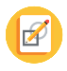
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

In [194]:
train_raw = clean_data[clean_data.year < 2015].reset_index(drop=True)
test_raw = clean_data[clean_data.year >= 2015].reset_index(drop=True)

In [227]:
train_raw.shape, test_raw.shape

((2756, 17), (427, 17))

selected_data.drop(['year', 'purchase_date'], axis=1, inplace=True)

In [228]:
train_raw.head()

cost     price  weight purchase_date product_type   product_level  \
0  333000.0  300492.0  3090.0    2008-12-19          Q,B        advanced   
1  264000.0  430570.0  3030.0    1997-09-10          J,D           basic   
2  270000.0  213070.0  3040.0    2001-09-05          J,D           basic   
3   97000.0  122659.0  2970.0    2000-01-12          D,R        advanced   
4   59000.0   60320.0  2930.0    2011-08-19            H  super advanced   

           maker                                         ingredient  height  \
0         M14122                                  IN732052,IN732053    2.76   
1  unknown_maker       IN732054,IN732055,IN732056,IN732057,IN732058    2.67   
2  unknown_maker                         IN732054,IN732059,IN732060    3.00   
3  unknown_maker                         IN732064,IN732065,IN732066    2.47   
4         M14124  IN732067,IN732068,IN732069,IN732070,IN732071,I...    2.71   

   width  depth  year  month  weekday  is_weekend  ingredient_number  volume  
0   0.97   0.26  2008     12        4       False                2.0    0.70  
1   0.98   0.26  1997      9        2       False                5.0    0.68  
2   0.93   0.24  2001      9        2       False                3.0    0.67  
3   1.01   0.26  2000      1        2       False                3.0    0.65  
4   0.96   0.25  2011      8        4       False                6.0    0.65

**Scalers can be used to preprocess numerical features.**
1. StandardScaler: Scales features to have zero mean and unit variance. It is a popular choice when working with algorithms that assume normally distributed features.
2. MinMaxScaler: Scales features to a specified range, usually between 0 and 1. It is useful when the distribution of the features is not necessarily Gaussian and you want to preserve the relative relationships between the values.
3. RobustScaler: Scales features using statistics that are robust to outliers, such as the median and interquartile range. It is suitable when the presence of outliers may significantly affect the mean and variance estimates.
4. MaxAbsScaler: Scales features to the range [-1, 1] by dividing through the maximum absolute value. It is useful when the data is already centered at zero and sparse, and you want to preserve the sparsity of the data.

### Build a class for data transforming

In [272]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import IterativeImputer
from category_encoders import TargetEncoder

class CustomDataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.dummy_encoder = OneHotEncoder(drop='first')
        self.target_encoder = TargetEncoder()
        self.imputer = IterativeImputer(max_iter=20, random_state=42)

    def fit(self, X, y=None):
        # Identify columns for each transformation
        numerical_columns = ['price', 'cost', 'weight', 'height', 'width', 'depth', 'ingredient_number']
        categorical_columns = ['product_type', 'product_level', 'maker', 'ingredient']

        # Fit dummy encoder on 'product_level'
        self.dummy_encoder.fit(X[categorical_columns])

        # Fit target encoder on 'product_type', 'maker', 'ingredient'
        self.target_encoder.fit(X[categorical_columns], y)

        # Fit iterative imputer on numerical columns
        self.imputer.fit(X[numerical_columns])

        # Calculate the most frequent value for each categorical column
        self.most_frequent_values = X[categorical_columns].mode().iloc[0]

        return self

    def transform(self, X, y=None):
        # Identify columns for each transformation
        numerical_columns = ['price', 'cost', 'weight', 'height', 'width', 'depth', 'ingredient_number']
        categorical_columns = ['product_type', 'product_level', 'maker', 'ingredient']

        # Dummy encoding for 'product_level'
        dummy_encoded = self.dummy_encoder.transform(X[categorical_columns])
        dummy_columns = self.dummy_encoder.get_feature_names_out()

        # Target encoding for 'product_type', 'maker', 'ingredient'
        target_encoded = self.target_encoder.transform(X[categorical_columns])
        target_columns = categorical_columns

        # Imputation for numerical columns
        imputed_features = self.imputer.transform(X[numerical_columns])

        # Replace missing values in categorical columns with the most frequent value
        categorical_features = X[categorical_columns].fillna(self.most_frequent_values)

        # Create a new DataFrame with the transformed features
        transformed_df = pd.DataFrame(np.concatenate((imputed_features, target_encoded, dummy_encoded.toarray()), axis=1),
                                      columns=numerical_columns + target_columns + dummy_columns)

        # Append the categorical features with the transformed DataFrame
        transformed_df = pd.concat([transformed_df, categorical_features.reset_index(drop=True)], axis=1)

        return transformed_df

In [273]:
# Instantiate the custom data transformer
custom_transformer = CustomDataTransformer()

# Define features and target variables
features = list(train_raw.columns)
target = 'price'
features.remove(target)

X_train = train_raw[features]
y_train = train_raw[target]

X_test = test_raw[features]
y_test = test_raw[target]

## PCA

In [274]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['price', 'cost', 'weight', 'height', 'width', 'depth', 'ingredient_number']
categorical_columns = ['product_type', 'product_level', 'maker', 'ingredient']
target_variable = 'price'  

# Apply feature scaling to numerical features
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(train_raw[numerical_columns])

# Apply TargetEncoder to categorical features
encoder = TargetEncoder(cols=categorical_columns)
encoded_categorical = encoder.fit_transform(train_raw[categorical_columns], train_raw[target_variable])

# Apply missing data imputation to numerical features
imputer = SimpleImputer(strategy='median')
imputed_numerical = imputer.fit_transform(scaled_numerical)

# Combine imputed numerical and encoded categorical features
combined_data = pd.concat([pd.DataFrame(imputed_numerical, columns=numerical_columns),
                           encoded_categorical], axis=1)


# the target variable (price) should not be included when performing PCA
# PCA is an unsupervised dimensionality reduction technique that focuses solely on the input features to identify the key components that capture the most variance in the data.
combined_data_withoutprice = combined_data.drop(columns=['price']).copy()


# Apply PCA on the combined data
n_components = 3  # Specify the desired number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(combined_data_withoutprice)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Access the principal components (eigenvectors)
principal_components = pca.components_

In [244]:
combined_data_withoutprice

cost    weight    height     width     depth  ingredient_number  \
0     0.350318  0.308725  0.588889  0.304348  0.333333           0.074074   
1     0.277070  0.268456  0.538889  0.326087  0.333333           0.185185   
2     0.283439  0.275168  0.722222  0.217391  0.166667           0.111111   
3     0.099788  0.228188  0.427778  0.391304  0.333333           0.111111   
4     0.059448  0.201342  0.561111  0.282609  0.250000           0.222222   
5     0.109696  0.449664  0.727778  0.282609  0.250000           0.074074   
6     0.070771  0.302013  0.705556  0.239130  0.250000           0.037037   
7     0.066879  0.469799  0.561111  0.413043  0.416667           0.370370   
8     0.123142  0.228188  0.633333  0.239130  0.250000           0.111111   
9     0.082803  0.208054  0.455556  0.347826  0.333333           0.148148   
10    0.199575  0.382550  0.650000  0.304348  0.250000           0.185185   
11    0.133404  0.281879  0.516667  0.347826  0.333333           0.074074   
12    0.217976  0.261745  0.466667  0.369565  0.333333           0.148148   
13    0.079972  0.375839  0.700000  0.282609  0.250000           0.037037   
14    0.020170  0.255034  0.472222  0.369565  0.333333           0.185185   
15    0.666667  0.637584  0.650000  0.434783  0.416667           0.222222   
16    0.117834  0.174497  0.238889  0.521739  0.500000           0.000000   
17    0.116773  0.402685  0.450000  0.456522  0.416667           0.185185   
18    0.140127  0.308725  0.194444  0.652174  0.666667           0.370370   
19    0.043524  0.201342  0.511111  0.304348  0.333333           0.111111   
20    0.099788  0.295302  0.738889  0.217391  0.166667           0.111111   
21    0.143312  0.268456  0.222222  0.608696  0.583333           0.074074   
22    0.026539  0.335570  0.722222  0.239130  0.250000           0.111111   
23    0.133050  0.187919  0.694444  0.173913  0.166667           0.259259   
24    0.119958  0.281879  0.422222  0.434783  0.416667           0.037037   
25    0.252654  0.255034  0.444444  0.391304  0.333333           0.259259   
26    0.202760  0.308725  0.411111  0.456522  0.416667           0.259259   
27    0.205945  0.416107  0.377778  0.543478  0.500000           0.296296   
28    0.216561  0.362416  0.344444  0.543478  0.500000           0.222222   
29    0.366242  0.261745  0.900000  0.108696  0.083333           0.222222   
30    0.099788  0.335570  0.500000  0.391304  0.333333           0.148148   
31    0.093418  0.134228  0.666667  0.173913  0.166667           0.222222   
32    0.183652  0.362416  0.450000  0.434783  0.416667           0.333333   
33    0.093418  0.362416  0.500000  0.413043  0.416667           0.148148   
34    0.010616  0.127517  0.361111  0.391304  0.333333           0.037037   
35    0.099788  0.208054  0.288889  0.500000  0.500000           0.074074   
36    0.132696  0.436242  0.550000  0.413043  0.416667           0.222222   
37    0.582803  0.429530  0.105556  0.826087  0.833333           0.037037   
38    0.024416  0.214765  0.744444  0.173913  0.166667           0.222222   
39    0.026539  0.241611  0.500000  0.347826  0.333333           0.185185   
40    0.249469  0.221477  0.422222  0.391304  0.333333           0.148148   
41    0.090941  0.154362  0.777778  0.108696  0.083333           0.296296   
42    0.159943  0.302013  0.433333  0.434783  0.416667           0.111111   
43    0.132696  0.409396  0.400000  0.521739  0.500000           0.111111   
44    0.064048  0.214765  0.672222  0.217391  0.166667           0.074074   
45    0.136943  0.369128  0.572222  0.347826  0.333333           0.148148   
46    0.099788  0.107383  0.522222  0.260870  0.250000           0.185185   
47    0.333333  0.550336  0.766667  0.304348  0.333333           0.370370   
48    0.066879  0.248322  0.622222  0.260870  0.250000           0.074074   
49    0.193206  0.489933  0.427778  0.521739  0.500000           0.259259   
50    0.400212  0.221477  0.211111  0.586957  0.583333           0.148148   
51    

In [275]:
explained_variance_ratio = pca.explained_variance_ratio_

# Access the principal components (eigenvectors)
principal_components = pca.components_

In [276]:
explained_variance_ratio

array([0.55296997, 0.24454757, 0.13565868])

This means that:
* Component 1 explains approximately 55.27% of the total variance in the data.
* Component 2 explains approximately 24.46% of the total variance.
* Component 3 explains approximately 13.60% of the total variance.

In [277]:
# Print the coefficients of each component
for i, component in enumerate(pca.components_):
    print(f"Component {i+1} Coefficients:")
    for j, feature_name in enumerate(combined_data_withoutprice.columns):
        print(f"{feature_name}: {component[j]}")
    print()

Component 1 Coefficients:
cost: 1.5206318624610504e-07
weight: 2.0878553175229797e-07
height: 6.785646802063973e-08
width: 5.518066021963597e-08
depth: 6.469534137282942e-08
ingredient_number: 4.1078106336190655e-07
product_type: 0.9214394320476688
product_level: 0.18901426117050413
maker: 0.26186069709443016
ingredient: 0.21599064206305174

Component 2 Coefficients:
cost: 2.254237351764042e-07
weight: 8.584409946221783e-07
height: 2.399013480532294e-07
width: 2.685791728650071e-07
depth: 2.7150413824582113e-07
ingredient_number: 9.819248848427488e-07
product_type: -0.31606914450848933
product_level: -0.12440191698649081
maker: 0.8155692458483571
ingredient: 0.4684776026280705

Component 3 Coefficients:
cost: 1.2992266593925486e-09
weight: 3.897996512496754e-07
height: 5.5664765427059914e-08
width: 1.5887166652385155e-07
depth: 1.5547369824066217e-07
ingredient_number: 2.6079472374977687e-08
product_type: 0.2242513827051602
product_level: -0.9666966692950403
maker: 0.010057066323452726

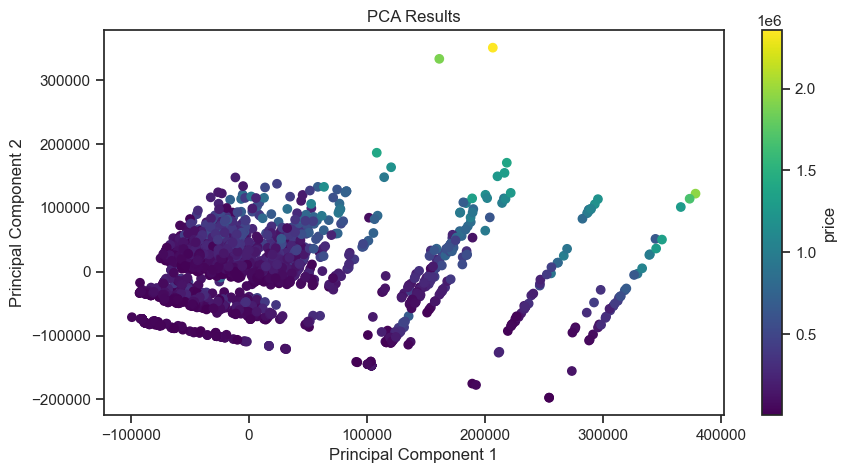

In [278]:
# Plotting the PCA results by create a scatter plot of the principal components
plt.figure(figsize=(10, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=train_raw[target_variable], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.colorbar(label=target_variable)
plt.show()

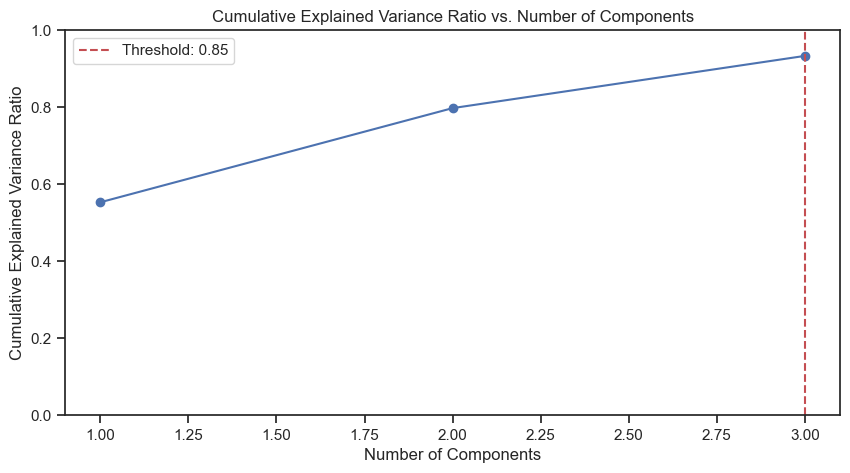

Number of Components satisfying the threshold: 3


In [279]:
# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 5))

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.ylim(0, 1)  # Set y-axis limits to 0% to 100%

# Find the number of components that satisfy the threshold
threshold = 0.85
n_components_threshold = np.argmax(cumulative_variance_ratio >= threshold) + 1
plt.axvline(x=n_components_threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')

plt.legend()
plt.show()

print("Number of Components satisfying the threshold:", n_components_threshold)

* 1. Plot the cumulative explained variance ratio as a function of the number of components and visually inspect the plot to identify the "elbow" point. The elbow point is the number of components where the incremental gain in explained variance starts to diminish significantly.
* 2. Another approach is to set a threshold for the cumulative explained variance ratio.

### Scale the numerical features and Encode the categorical features

In [280]:
numerical_columns

['price', 'cost', 'weight', 'height', 'width', 'depth', 'ingredient_number']

In [281]:
categorical_columns

['product_type', 'product_level', 'maker', 'ingredient']

### Perform dimensionality reduction
* Use the three components obtained from PCA to reduce the dimensionality of the combined numerical and encoded categorical features. Transform the data using only the three principal components obtained from PCA.

In [282]:
# Apply PCA with three components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(combined_data_withoutprice)

#Fit the PCA model to the combined data:
pca.fit(combined_data_withoutprice)

#Transform the combined data using the fitted PCA model:
pca_data = pca.transform(combined_data_withoutprice)

# Create a new DataFrame with the transformed data from PCA:
pca_df = pd.DataFrame(pca_data, columns=[f"Component {i+1}" for i in range(n_components)])

In [283]:
pca_df

Component 1    Component 2    Component 3
0     154365.797489   33191.495919     293.778280
1       3995.508555  -42943.652571  -53749.339807
2      -2116.722754  -56200.909659  -50271.061381
3     -42647.743573  -47356.127956  -35556.542937
4     -65028.672678   33395.142371   36455.974610
5       5033.216380    7981.595288   51315.602091
6     288371.597529 -107713.275151   43370.627465
7     -82684.737263  -24795.237776   33721.812496
8      26631.862307   12415.279634  -24764.093893
9     -33213.561116   25969.727333  -39779.610395
10    -53750.363226   18649.566044   39490.097226
11     39292.204962    4857.225366  -20301.018264
12     25300.244126    7688.985891  -25187.187540
13    -69334.595254   21197.097878   37069.788925
14    -63177.344432  -42535.233801   42042.742452
15     78293.016476   75104.297516  -23336.224901
16    -43407.075718  -27698.789297  -29652.818519
17    -42814.085396   40760.930298  -43335.103282
18      8637.228286   89684.856431   42513.096409
19    -42795.168367   19373.487126   41815.669025
20    -13145.942772   41302.903586  -36495.291895
21    -19808.733523   37525.517343  -35435.409076
22    -49521.294181   34003.781221   38312.777560
23    -52975.941317   24615.443676   39061.049448
24    -31152.456447   11836.890154   44686.140113
25     36142.085036   21896.325365  -27301.103281
26    -10109.533081   36543.115853   45163.030274
27    -39120.254813  -48814.018355   47259.352163
28     19228.860452   90162.320108   40619.541396
29     -1235.102497   35111.632548   45413.141522
30    -35770.956768   77288.212654   39135.629849
31    -15666.118245   22455.828517   47017.565110
32      2243.726703   30224.660270   49581.913740
33     41328.435824   11716.426166  -19890.451679
34    -83070.834525  -36915.689307   37590.735377
35    -39162.349333   20095.640195   41864.434108
36     -9108.341188   31718.697342  -36093.428774
37     47880.660954   -8951.183289  -17652.869316
38     36541.926923   -8595.845563  -19853.094214
39    -40527.669586   29753.518355   41159.407866
40     -5096.596973   62691.396340  -38551.250908
41    -68444.239992   22889.047794   36409.435670
42    -53115.531008   21226.966486   39900.087101
43    -47589.829902   36813.227827   39069.195395
44    -66521.851253   14444.353941   38109.374829
45    -45088.492448   47398.363954   34308.056474
46    118345.006504 -104004.949510    4085.458308
47     53131.389281   99413.929688  -25263.796693
48    -70822.372528  -41463.583170  -41193.521452
49    -12912.092537   85812.965021  -44584.341658
50    173289.611739   40327.738303  -22485.714901
51    165164.803291   29162.316632   -4991.949593
52     -6682.757869  -57069.162971  -33146.032588
53    -40254.591459   22187.415563  -40230.950078
54    -71455.923042  -45998.206116  -45304.604723
55    -32022.068878    1744.572417  -34454.006442
56     14576.291104   16299.233389   52353.004353
57     43246.938685   14368.314041  -18258.430174
58    -42231.112317  -46452.466528  -35793.634669
59    -39990.504327   26909.973324   41153.278266
60    -51117.843365  -41204.672122   43209.453132
61      9692.292384   16742.481587  -28759.970324
62    -39588.782471   21571.026476   43649.206858
63    -44089.668118  -50483.621571  -34735.989070
64     12316.313725   12650.804140   54444.345044
65     -8049.149687   -1589.707340  -29257.867993
66    -38431.798233    7812.793025   44519.040547
67    -30388.168478    2097.422190  -34558.973056
68    -27994.679372    8504.332155  -35140.121728
69    -68971.937981  -28078.990560   36599.853983
70    -53409.117970   20454.319680   39979.870308
71    -46323.583998   38171.234671   37456.593692
72    -28969.400734    6302.346107  -34641.874113
73    -26915.797806 -100954.055172  -21632.046494
74     30807.338857  -15878.292302  -18914.253033
75    -60712.808462  -37189.724884   40640.252615
76    -86987.382776  -34127.554378   36170.312610
77    -30401.836580    6095.877019  -34838.247407
78    -47234.065049   52681.651821   33984.068524
79    -2

1. When performing dimensionality reduction, it is generally recommended to only use the training dataset for fitting the PCA model and transforming the data. This is to avoid data leakage and ensure that the dimensionality reduction is based solely on the information contained in the training dataset.

2. The steps for dimensionality reduction should be applied separately to the training and test datasets. **This means that you will fit the PCA model using the training dataset and transform both the training and test datasets using the same PCA model.**

In [284]:
numerical_columns = ['cost', 'weight', 'height', 'width', 'depth', 'ingredient_number']
categorical_columns = ['product_type', 'product_level', 'maker', 'ingredient']
target_variable = 'price' 

# Apply feature scaling to numerical features
scaler = StandardScaler()
scaled_numerical_train = scaler.fit_transform(train_raw[numerical_columns])
scaled_numerical_test = scaler.transform(test_raw[numerical_columns])  # Use transform on test data

# Apply TargetEncoder to categorical features
encoder = TargetEncoder(cols=categorical_columns)
encoded_categorical_train = encoder.fit_transform(train_raw[categorical_columns], train_raw[target_variable])
encoded_categorical_test = encoder.transform(test_raw[categorical_columns])  # Use transform on test data

# Apply missing data imputation to numerical features
imputer = SimpleImputer(strategy='median')
imputed_numerical_train = imputer.fit_transform(scaled_numerical_train)
imputed_numerical_test = imputer.transform(scaled_numerical_test)  # Use transform on test data

# Combine imputed numerical and encoded categorical features
X_train = pd.concat([pd.DataFrame(imputed_numerical_train, columns=numerical_columns),
                                 encoded_categorical_train], axis=1)
X_test = pd.concat([pd.DataFrame(imputed_numerical_test, columns=numerical_columns),
                                encoded_categorical_test], axis=1)

In [285]:
X_train

cost    weight    height     width     depth  ingredient_number  \
0     1.426099  0.120794  0.478390 -0.502659 -0.106172          -0.707478   
1     0.887556 -0.210507  0.144635 -0.321452 -0.106172           0.251445   
2     0.934386 -0.155290  1.368402 -1.227488 -1.457722          -0.387837   
3    -0.415875 -0.541807 -0.597042  0.222169 -0.106172          -0.387837   
4    -0.712464 -0.762674  0.292970 -0.683866 -0.781947           0.571086   
5    -0.343028  1.280345  1.405486 -0.683866 -0.781947          -0.707478   
6    -0.629211  0.065577  1.257150 -1.046281 -0.781947          -1.027119   
7    -0.657829  1.445995  0.292970  0.403377  0.569603           1.849650   
8    -0.244165 -0.541807  0.775060 -1.046281 -0.781947          -0.387837   
9    -0.540754 -0.707457 -0.411623 -0.140245 -0.106172          -0.068196   
10    0.317793  0.728178  0.886312 -0.502659 -0.781947           0.251445   
11   -0.168717 -0.100073 -0.003700 -0.140245 -0.106172          -0.707478   
12    0.453079 -0.265724 -0.337455  0.040962 -0.106172          -0.068196   
13   -0.561567  0.672961  1.220066 -0.683866 -0.781947          -1.027119   
14   -1.001248 -0.320940 -0.300371  0.040962 -0.106172           0.251445   
15    3.751981  2.826414  0.886312  0.584584  0.569603           0.571086   
16   -0.283190 -0.983541 -1.857892  1.309412  1.245378          -1.346760   
17   -0.290995  0.893828 -0.448706  0.765791  0.569603           0.251445   
18   -0.119286  0.120794 -2.154563  2.396656  2.596927           1.849650   
19   -0.829538 -0.762674 -0.040784 -0.502659 -0.106172          -0.387837   
20   -0.415875  0.010360  1.479653 -1.227488 -1.457722          -0.387837   
21   -0.095871 -0.210507 -1.969144  2.034241  1.921152          -0.707478   
22   -0.954418  0.341661  1.368402 -1.046281 -0.781947          -0.387837   
23   -0.171319 -0.873108  1.182983 -1.589902 -1.457722           0.890727   
24   -0.267580 -0.100073 -0.634126  0.584584  0.569603          -1.027119   
25    0.708042 -0.320940 -0.485790  0.222169 -0.106172           0.890727   
26    0.341208  0.120794 -0.708293  0.765791  0.569603           0.890727   
27    0.364623  1.004261 -0.930796  1.490620  1.245378           1.210368   
28    0.442672  0.562527 -1.153299  1.490620  1.245378           0.571086   
29    1.543174 -0.265724  2.555085 -2.133524 -2.133497           0.571086   
30   -0.415875  0.341661 -0.114952  0.222169 -0.106172          -0.068196   
31   -0.462704 -1.314841  0.997563 -1.589902 -1.457722           0.571086   
32    0.200718  0.562527 -0.448706  0.584584  0.569603           1.530009   
33   -0.462704  0.562527 -0.114952  0.403377  0.569603          -0.068196   
34   -1.071492 -1.370058 -1.042048  0.222169 -0.106172          -1.027119   
35   -0.415875 -0.707457 -1.524138  1.128205  1.245378          -0.707478   
36   -0.173920  1.169912  0.218803  0.403377  0.569603           0.571086   
37    3.135388  1.114695 -2.747905  3.846313  3.948477          -1.027119   
38   -0.970028 -0.652241  1.516737 -1.589902 -1.457722           0.571086   
39   -0.954418 -0.431374 -0.114952 -0.140245 -0.106172           0.251445   
40    0.684627 -0.597024 -0.634126  0.222169 -0.106172          -0.068196   
41   -0.480916 -1.149191  1.739240 -2.133524 -2.133497           1.210368   
42    0.026407  0.065577 -0.559958  0.584584  0.569603          -0.387837   
43   -0.173920  0.949045 -0.782461  1.309412  1.245378          -0.387837   
44   -0.678642 -0.652241  1.034647 -1.227488 -1.457722          -0.707478   
45   -0.142701  0.617744  0.367138 -0.140245 -0.106172          -0.068196   
46   -0.415875 -1.535708  0.033384 -0.865074 -0.781947           0.251445   
47    1.301219  2.108596  1.665073 -0.502659 -0.106172           1.849650   
48   -0.657829 -0.376157  0.700893 -0.865074 -0.781947          -0.707478   
49    0.270963  1.611645 -0.597042  1.309412  1.245378           0.890727   
50    1.792933 -0.597024 -2.043312  1.853034  1.921152          -0.068196   
51    

In [286]:
X_test

cost    weight    height     width     depth  ingredient_number  \
0   -0.548559 -0.100073 -0.485790  0.403377  0.569603          -0.387837   
1    0.075839  2.053379  1.034647  0.040962 -0.106172           0.251445   
2    0.075839  0.286444  1.108815 -0.865074 -0.781947           0.890727   
3   -0.728074 -0.486590 -1.820809  1.671827  1.245378          -1.346760   
4   -1.032467  0.783394 -0.189120  0.584584  0.569603          -0.707478   
5   -0.954418  0.286444  1.887576 -1.408695 -1.457722          -0.068196   
6   -1.055882 -1.093975 -0.448706 -0.140245 -0.106172          -0.068196   
7   -0.173920  0.507311  0.330054 -0.140245 -0.106172           0.890727   
8   -0.657829  1.004261  0.367138  0.222169 -0.106172          -0.068196   
9    0.351614  0.783394  0.033384  0.403377  0.569603          -0.068196   
10  -0.462704  0.396877 -1.153299  1.309412  1.245378          -0.387837   
11   0.000391 -0.155290  1.220066 -1.227488 -1.457722          -0.387837   
12  -0.845148 -0.100073 -0.189120  0.040962 -0.106172           0.251445   
13  -0.462704 -1.425275 -0.856629  0.040962 -0.106172           0.571086   
14   3.018313  0.286444 -1.042048  1.128205  1.245378           0.890727   
15   0.934386  0.783394  0.404222  0.040962 -0.106172          -0.707478   
16  -0.735878  0.286444  0.367138 -0.140245 -0.106172           0.571086   
17  -0.244165 -0.100073 -0.374539  0.222169 -0.106172           1.210368   
18  -0.064651 -1.149191 -1.079132  0.403377  0.569603           0.571086   
19  -0.522543 -0.210507  0.960480 -1.046281 -0.781947          -1.346760   
20   0.286573  1.390779 -1.598306  2.396656  2.596927          -0.387837   
21  -0.462704 -0.597024  0.070467 -0.502659 -0.781947           0.890727   
22  -0.205140 -0.707457  0.144635 -0.502659 -0.781947          -0.707478   
23  -0.993443 -0.652241 -0.374539 -0.140245 -0.106172          -1.027119   
24   0.442672  0.617744  0.552557 -0.321452 -0.106172           0.251445   
25   2.034887  0.562527 -0.448706  0.765791  0.569603           2.169291   
26  -0.002211  0.507311 -1.153299  1.309412  1.245378          -0.068196   
27   0.031611 -0.762674 -0.930796  0.403377  0.569603          -1.346760   
28   1.910007  1.832512 -0.559958  1.490620  1.245378           0.571086   
29   4.977362  1.887729  1.108815 -0.140245 -0.106172           5.046060   
30  -0.657829 -0.320940  1.331318 -1.408695 -1.457722           1.210368   
31  -0.517339 -1.093975  0.144635 -0.683866 -0.781947          -0.068196   
32  -0.657829  0.286444 -1.709557  1.853034  1.921152           0.571086   
33   4.977362  2.439896 -0.040784  1.309412  1.245378           2.169291   
34  -0.475713 -1.590925  0.552557 -1.408695 -1.457722          -1.346760   
35  -0.717667 -0.817891 -0.300371 -0.140245 -0.106172          -0.387837   
36  -0.545957 -0.155290 -0.300371  0.040962 -0.106172           0.251445   
37  -0.907588  0.672961  0.330054  0.040962 -0.106172          -1.346760   
38   1.301219  0.893828  1.034647 -0.502659 -0.781947           0.251445   
39  -0.977833  0.507311 -0.893713  1.128205  1.245378          -0.068196   
40  -0.350833 -0.044857 -0.597042  0.584584  0.569603           0.571086   
41   2.893434  0.065577  1.368402 -1.227488 -1.457722           0.890727   
42  -0.798318  0.176010 -0.745377  0.765791  0.569603           0.251445   
43  -0.712464  0.672961  0.663809 -0.321452 -0.106172           0.890727   
44   0.146083  0.838611 -0.300371  0.765791  0.569603           1.530009   
45  -0.931003  0.783394  0.107551  0.222169 -0.106172           0.251445   
46   0.567552  1.556429 -0.448706  1.128205  1.245378          -0.707478   
47  -1.032467 -0.928324  0.181719 -0.683866 -0.781947          -1.346760   
48  -1.001248  0.507311 -1.227467  1.490620  1.245378          -0.068196   
49  -0.173920  0.562527  0.181719  0.040962 -0.106172          -0.068196   
50  -0.657829 -0.210507  0.367138 -0.502659 -0.781947          -0.707478   
51  -0.290995  3.268147 -2.896240  5.295970  5.300027    

In [287]:
# Fit PCA on the training dataset
pca.fit(X_train)

# Transform the training and test datasets using the fitted PCA model
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [288]:
X_train_pca

array([[154365.79748842,  33191.49589973,    293.77827599],
       [  3995.50855468, -42943.65256676, -53749.33980402],
       [ -2116.72275767, -56200.90966185, -50271.06138007],
       ...,
       [  9029.91363171,  -3744.51014295, -30491.74236857],
       [ 35012.43426175, -14117.81379366, -20399.03931464],
       [-90232.33862594, -74192.19911069,  48698.47870992]])

In [289]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forests regressor
rf = RandomForestRegressor()

# Fit the model on the transformed training data
rf.fit(X_train_pca, y_train)

# Make predictions on the transformed test data
y_pred = rf.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 75482234770.98593
R-squared Score: 0.12660285092740708


In [290]:
from tabulate import tabulate
# Calculate evaluation metrics
metrics_data = {'Metric': ['MSE', 'R2 Score'],
                'Value': [mse, r2]}
metrics_df = pd.DataFrame(metrics_data)

# Print the table
print(tabulate(metrics_df, headers='keys', tablefmt='psql'))

+----+----------+-------------+
|    | Metric   |       Value |
|----+----------+-------------|
|  0 | MSE      | 7.54822e+10 |
|  1 | R2 Score | 0.126603    |
+----+----------+-------------+


Alternatively, you can explore other dimensionality reduction techniques that are specifically designed for categorical data, such as Multiple Correspondence Analysis (MCA) or CatPCA, which can capture the relationships and patterns within categorical features more effectively.

Overall, while PCA can be applied to a combined dataset of numerical and categorical features, it is crucial to handle the categorical features appropriately to ensure accurate representation and optimal performance of the model.

# Feature Engineering 
numerical_columns = ['cost', 'weight', 'height_in_meters', 'width_in_meters', 'depth_in_meters', 'volume']

categorical_columns = ['product_type', 'product_level', 'maker', 'ingredient']

target_variable = 'price' 

Improving model performance can be achieved through various approaches.

* Feature Engineering: Consider creating new features or transforming existing ones to capture more relevant information for the target variable. This can involve techniques such as one-hot encoding, binning, interaction terms, polynomial features, or feature scaling.

* Feature Selection: Identify the most informative features that contribute significantly to the target variable and remove irrelevant or redundant features. This can be done through techniques like statistical tests, correlation analysis, or model-based feature selection.

* Hyperparameter Tuning: Experiment with different combinations of hyperparameters for your model. Hyperparameters control the behavior of the model and optimizing them can improve its performance. Techniques like grid search, random search, or Bayesian optimization can be used for hyperparameter tuning.

* Ensemble Methods: Explore ensemble techniques like bagging, boosting, or stacking. Ensemble models combine multiple individual models to make predictions, often leading to improved performance.

* Data Augmentation: If you have limited training data, consider augmenting your dataset by generating additional synthetic data or applying techniques like oversampling or undersampling to balance the classes.

* Cross-Validation: Ensure that you are using appropriate cross-validation techniques to evaluate your model's performance and generalize well to unseen data. This helps in estimating the model's performance on different data samples.

* Regularization: Regularization techniques like L1 or L2 regularization can help prevent overfitting by adding a penalty term to the loss function. This encourages the model to generalize better to unseen data.

* Model Selection: Experiment with different algorithms or models to find the one that best fits your data. Different models have different strengths and weaknesses, and some may perform better than others depending on your specific dataset.

* Data Preprocessing: Ensure that your data is preprocessed appropriately. This may involve handling missing values, outliers, or skewed distributions. Scaling or normalizing the features can also be beneficial for some models.

* More Data: If possible, consider acquiring more data to improve the model's performance. More data can help the model learn better patterns and generalize well.

Remember that improving model performance is an iterative process. It may require trying multiple approaches and fine-tuning various aspects of the model. Additionally, the specific techniques that work best can depend on your dataset and the problem you are trying to solve.

In [291]:
# Define train set
features = list(train_raw.columns)
target = 'price'
features.remove(target)

X_train = train_raw[features]
y_train = train_raw[target]

# Define test set
features_test = list(test_raw.columns)
target_test = 'price'
features_test.remove(target_test)

X_test = test_raw[features_test]
y_test = test_raw[target_test]
X_train.describe()

cost       weight                  purchase_date       height  \
count    2744.000000  2756.000000                           2756  2756.000000   
mean   150283.284742  3068.123730  2005-12-20 23:49:33.004354176     2.630998   
min      3000.000000  2630.000000            1996-08-09 00:00:00     1.700000   
25%     66000.000000  2940.000000            2001-07-13 00:00:00     2.450000   
50%    110666.666667  3040.000000            2006-04-09 12:00:00     2.620000   
75%    191000.000000  3160.000000            2010-04-07 12:00:00     2.820000   
max    945000.000000  4120.000000            2014-12-26 00:00:00     3.500000   
std    128146.796036   181.137381                            NaN     0.269708   

             width        depth         year     month   weekday  \
count  2756.000000  2756.000000       2756.0    2756.0    2756.0   
mean      0.997739     0.261571  2005.461538  6.653483  3.788462   
min       0.830000     0.220000       1996.0       1.0       0.0   
25%       0.960000     0.250000       2001.0       4.0       4.0   
50%       0.990000     0.260000       2006.0       7.0       4.0   
75%       1.030000     0.270000       2010.0      10.0       4.0   
max       1.290000     0.340000       2014.0      12.0       6.0   
std       0.055195     0.014801     5.186151  3.410248  0.652142   

       ingredient_number       volume  
count        2756.000000  2756.000000  
mean            4.213353     0.682083  
min             0.000000     0.590000  
25%             2.000000     0.650000  
50%             4.000000     0.680000  
75%             6.000000     0.700000  
max            27.000000     0.920000  
std             3.129077     0.041079

### Deal with outliers in cost feature

In [292]:
# Display the descriptive statistics of the "cost" feature
print(X_train['cost'].describe())

count      2744.000000
mean     150283.284742
std      128146.796036
min        3000.000000
25%       66000.000000
50%      110666.666667
75%      191000.000000
max      945000.000000
Name: cost, dtype: float64


However, the log-transformed "cost" feature is still right-skewed and does not follow a normal distribution. I tried other transformations to address the skewness. Some common transformations to consider are square root transformation, inverse transformation, or Box-Cox transformation.
Winsorization is a technique used to limit the impact of outliers by replacing extreme values with values at a specified percentile. However, winsorized_cost is not good in this case as it changed the outliers to 34000.0.

Therefore, I decided to impute outliers by the median of cost.

In [293]:
# Calculate the interquartile range (IQR)
Q1 = np.nanpercentile(X_train['cost'], 25)
Q3 = np.nanpercentile(X_train['cost'], 75)
IQR = Q3 - Q1

if np.isnan(IQR):
    print("No outliers found in the 'cost' column.")
else:
    # Define the lower and upper limits for outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Count the number of outliers before imputation
    outliers_before = X_train[(X_train['cost'] < lower_limit) | (X_train['cost'] > upper_limit)].shape[0]

    # Compute the median of the non-outlier values
    median_value = np.nanmedian(X_train['cost'])

    # Replace the outlier values with the median
    X_train.loc[X_train['cost'] > upper_limit, 'cost'] = median_value
    X_train.loc[X_train['cost'] < lower_limit, 'cost'] = median_value

    # Count the number of outliers after imputation
    outliers_after = X_train[(X_train['cost'] < lower_limit) | (X_train['cost'] > upper_limit)].shape[0]

    # Calculate the number of imputed outliers
    imputed_outliers = outliers_before - outliers_after

    print("Number of imputed outliers:", imputed_outliers)

Number of imputed outliers: 197


In [294]:
X_train.describe()

cost       weight                  purchase_date       height  \
count    2744.000000  2756.000000                           2756  2756.000000   
mean   121965.379009  3068.123730  2005-12-20 23:49:33.004354176     2.630998   
min      3000.000000  2630.000000            1996-08-09 00:00:00     1.700000   
25%     66000.000000  2940.000000            2001-07-13 00:00:00     2.450000   
50%    110666.666667  3040.000000            2006-04-09 12:00:00     2.620000   
75%    160000.000000  3160.000000            2010-04-07 12:00:00     2.820000   
max    370000.000000  4120.000000            2014-12-26 00:00:00     3.500000   
std     76356.786660   181.137381                            NaN     0.269708   

             width        depth         year     month   weekday  \
count  2756.000000  2756.000000       2756.0    2756.0    2756.0   
mean      0.997739     0.261571  2005.461538  6.653483  3.788462   
min       0.830000     0.220000       1996.0       1.0       0.0   
25%       0.960000     0.250000       2001.0       4.0       4.0   
50%       0.990000     0.260000       2006.0       7.0       4.0   
75%       1.030000     0.270000       2010.0      10.0       4.0   
max       1.290000     0.340000       2014.0      12.0       6.0   
std       0.055195     0.014801     5.186151  3.410248  0.652142   

       ingredient_number       volume  
count        2756.000000  2756.000000  
mean            4.213353     0.682083  
min             0.000000     0.590000  
25%             2.000000     0.650000  
50%             4.000000     0.680000  
75%             6.000000     0.700000  
max            27.000000     0.920000  
std             3.129077     0.041079

In [295]:
X_train

cost  weight purchase_date product_type   product_level  \
0     333000.000000  3090.0    2008-12-19          Q,B        advanced   
1     264000.000000  3030.0    1997-09-10          J,D           basic   
2     270000.000000  3040.0    2001-09-05          J,D           basic   
3      97000.000000  2970.0    2000-01-12          D,R        advanced   
4      59000.000000  2930.0    2011-08-19            H  super advanced   
5     106333.333333  3300.0    1996-10-11            S  super advanced   
6      69666.666667  3080.0    2010-01-08          B,A        advanced   
7      66000.000000  3330.0    2014-08-01            H  super advanced   
8     119000.000000  2970.0    2005-02-04          K,D        advanced   
9      81000.000000  2940.0    2008-04-04            N        advanced   
10    191000.000000  3200.0    2001-12-21            U  super advanced   
11    128666.666667  3050.0    2006-12-15          U,A        advanced   
12    208333.333333  3020.0    2010-01-29          K,D        advanced   
13     78333.333333  3190.0    1998-05-13            H  super advanced   
14     22000.000000  3010.0    1999-12-10            D  super advanced   
15    110666.666667  3580.0    2010-08-27          H,A        advanced   
16    114000.000000  2890.0    2013-04-26            G    intermediate   
17    113000.000000  3230.0    2009-01-09            H        advanced   
18    135000.000000  3090.0    2012-12-28          D,A  super advanced   
19     44000.000000  2930.0    2013-12-13            D  super advanced   
20     97000.000000  3070.0    2008-10-31          D,R        advanced   
21    138000.000000  3030.0    2001-01-26          D,H        advanced   
22     28000.000000  3130.0    2004-04-09            N  super advanced   
23    128333.333333  2910.0    2008-02-22            N  super advanced   
24    116000.000000  3050.0    1997-07-11            F  super advanced   
25    241000.000000  3010.0    2004-03-19            A        advanced   
26    194000.000000  3090.0    2014-05-16          D,A  super advanced   
27    197000.000000  3250.0    2001-12-07          D,A  super advanced   
28    207000.000000  3170.0    2007-12-21          Q,A  super advanced   
29    348000.000000  3020.0    2014-12-19          Q,A  super advanced   
30     97000.000000  3130.0    2008-08-01            N  super advanced   
31     91000.000000  2830.0    2012-05-25          D,A  super advanced   
32    176000.000000  3170.0    2008-06-20            W  super advanced   
33     91000.000000  3170.0    2014-12-05          U,A        advanced   
34     13000.000000  2820.0    2000-12-13          F,D  super advanced   
35     97000.000000  2940.0    2002-12-13          D,R  super advanced   
36    128000.000000  3280.0    2014-01-24          T,H        advanced   
37    110666.666667  3270.0    2014-10-08          H,A        advanced   
38     26000.000000  2950.0    2010-04-30            R        advanced   
39     28000.000000  2990.0    2012-07-13          D,H  super advanced   
40    238000.000000  2960.0    2004-11-26          D,R        advanced   
41     88666.666667  2860.0    1999-06-11            H  super advanced   
42    153666.666667  3080.0    2009-01-30            U  super advanced   
43    128000.000000  3240.0    1999-12-10            U  super advanced   
44     63333.333333  2950.0    1998-01-30          F,D  super advanced   
45    132000.000000  3180.0    2003-08-22          P,H  super advanced   
46     97000.000000  2790.0    2010-06-23            C        advanced   
47    317000.000000  3450.0    2002-04-12            S        advanced   
48     66000.000000  3000.0    2007-01-12            H        advanced   
49    185000.000000  3360.0    2002-10-04          Q,H        advanced   
50    110666.666667  2960.0    1999-09-03            C           basic   
51    110666.666667  2960.0    2010-08-20            C    intermediate   
52     62000.000000  2960.0    2005-04-29          J,D    intermediate   
53    238000.000000

### To explore the time series relationships and predict the price

In [299]:
# Resample the data to a specific frequency, such as monthly, and calculate the mean price for each period:
raw_data['purchase_date'] = pd.to_datetime(raw_data['purchase_date'])
raw_data.set_index('purchase_date', inplace=True)
raw_data.sort_index(inplace=True)
monthly_avg_price = raw_data['price'].resample('M').mean()

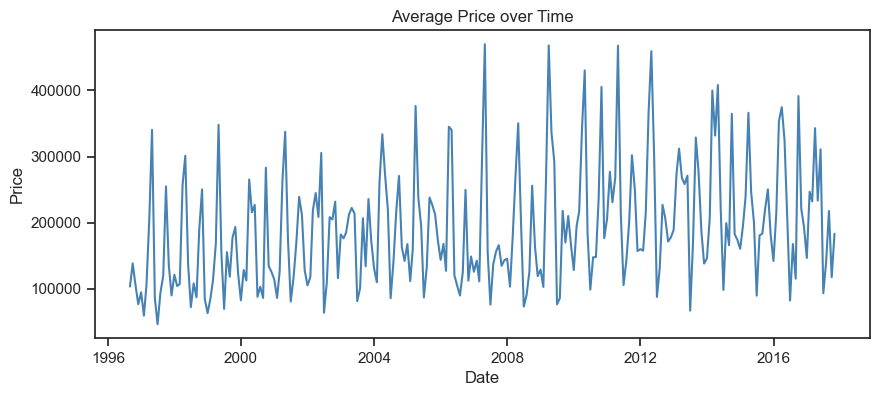

In [300]:
plt.figure(figsize=(10, 4))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, color='steelblue')
plt.title('Average Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### 1. Random Forests
* Random Forest: Random Forest is an ensemble learning method that combines multiple decision trees. It is known for its robustness to outliers due to the averaging effect of multiple trees, which helps reduce the impact of individual outliers.

In [301]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from category_encoders import TargetEncoder
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error


# Prepare the feature columns
numerical_columns = ['cost', 'weight','volume', 'ingredient_number']
categorical_columns = ['product_type', 'product_level']
target_variable = 'price' 

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=20)),  # Use IterativeImputer for MICE imputation
    ('scaler', RobustScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder()),
    ('knn_imputer', KNNImputer(n_neighbors=25))
])

# Create a ColumnTransformer to apply the transformers to specific columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Create the xgboost pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=2, min_samples_leaf=4, random_state=42))
])

# Fit the pipeline to the training data
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
rf_y_train_pred = rf_pipeline.predict(X_train)
rf_y_test_pred = rf_pipeline.predict(X_test)

# Evaluate the model on the training set
rf_train_mae = mean_absolute_error(y_train, rf_y_train_pred)
rf_train_mse = mean_squared_error(y_train, rf_y_train_pred)
rf_train_r2 = r2_score(y_train, rf_y_train_pred)

# Calculate and print evaluation metrics on the testing set
rf_test_mae = mean_absolute_error(y_test, rf_y_test_pred)
rf_test_mse = mean_squared_error(y_test, rf_y_test_pred)
rf_test_r2 = r2_score(y_test, rf_y_test_pred)

# Define the evaluation metrics
rf_metrics = [["Train R2", rf_train_r2], ["Train MSE", rf_train_mse], ["Train MAE", rf_train_mae],
               ["Test R2", rf_test_r2], ["Test MSE", rf_test_mse], ["Test MAE", rf_test_mae]]

# Print the metrics in a table with two decimals
print(tabulate(rf_metrics, headers=["Metric", "Value"], tablefmt="fancy_grid", floatfmt=".2f"))

╒═══════════╤════════════════╕
│ Metric    │          Value │
╞═══════════╪════════════════╡
│ Train R2  │           0.48 │
├───────────┼────────────────┤
│ Train MSE │ 22036598461.58 │
├───────────┼────────────────┤
│ Train MAE │      101336.45 │
├───────────┼────────────────┤
│ Test R2   │           0.41 │
├───────────┼────────────────┤
│ Test MSE  │ 50787972575.49 │
├───────────┼────────────────┤
│ Test MAE  │      131372.61 │
╘═══════════╧════════════════╛


**Performing hyperparameter tuning on the random forest model**

In [303]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 5, 8],
    'random_forest__min_samples_split': [2, 5, 7],
    'random_forest__min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object using the random forest pipeline (rf_pipeline)
grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=5, scoring='r2')

# Start the timer
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Calculate the running time
running_time = time.time() - start_time

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Running Time:", running_time, "seconds")

Best Hyperparameters: {'random_forest__max_depth': 8, 'random_forest__min_samples_leaf': 4, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 200}
Best Score: 0.32611631452074913
Running Time: 162.7509467601776 seconds


In [1193]:
from sklearn.model_selection import GridSearchCV, KFold

# Define the parameter grid to search over
param_grid = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 5, 8],
    'random_forest__min_samples_split': [2, 5, 7],
    'random_forest__min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object using the random forest pipeline (rf_pipeline)
grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=KFold(n_splits=5), scoring='r2')

# Start the timer
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Calculate the running time
running_time = time.time() - start_time

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Running Time:", running_time, "seconds")

Best Hyperparameters: {'random_forest__max_depth': 5, 'random_forest__min_samples_leaf': 4, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 50}
Best Score: 0.3681359500598618
Running Time: 131.92030382156372 seconds


* In summary, k-fold cross-validation is a technique for evaluating a model's performance, while GridSearchCV is a tool for finding the best set of hyperparameters for a model using cross-validation. They can be used together, where k-fold cross-validation is performed within GridSearchCV to evaluate the performance of different hyperparameter combinations.

### 2. XGBoost 

In [218]:
from sklearn.impute import IterativeImputer
import xgboost as xgb
from sklearn.model_selection import KFold


# Prepare the feature columns
numerical_columns = ['cost', 'weight', 'volume', 'ingredient_number']
categorical_columns = ['product_type', 'product_level']
target_variable = 'price' 


# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10)),  
    ('scaler', MinMaxScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder()),
    ('knn_imputer', KNNImputer(n_neighbors=10))
])

# Create a ColumnTransformer to apply the transformers to specific columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Create the xgboost pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(max_depth=5, n_estimators=30, colsample_bytree=0.6, learning_rate=0.05, subsample=1.0, random_state=42))
])


# Fit the pipeline to the training data
xgb_pipeline.fit(X_train, y_train)

# Make predictions on the test set
xgb_y_train_pred = xgb_pipeline.predict(X_train)
xgb_y_test_pred = xgb_pipeline.predict(X_test)

# Evaluate the model on the training set
xgb_train_mae = mean_absolute_error(y_train, xgb_y_train_pred)
xgb_train_mse = mean_squared_error(y_train, xgb_y_train_pred)
xgb_train_r2 = r2_score(y_train, xgb_y_train_pred)

# Calculate and print evaluation metrics on the testing set
xgb_test_mae = mean_absolute_error(y_test, xgb_y_test_pred)
xgb_test_mse = mean_squared_error(y_test, xgb_y_test_pred)
xgb_test_r2 = r2_score(y_test, xgb_y_test_pred)

# Define the evaluation metrics
xgb_metrics = [["Train R2", xgb_train_r2], ["Train MSE", xgb_train_mse], ["Train MAE", xgb_train_mae],
               ["Test R2", xgb_test_r2], ["Test MSE", xgb_test_mse], ["Test MAE", xgb_test_mae]]

# Print the metrics in a table with two decimals
print(tabulate(xgb_metrics, headers=["Metric", "Value"], tablefmt="fancy_grid", floatfmt=".2f"))

╒═══════════╤════════════════╕
│ Metric    │          Value │
╞═══════════╪════════════════╡
│ Train R2  │           0.40 │
├───────────┼────────────────┤
│ Train MSE │ 25674289784.82 │
├───────────┼────────────────┤
│ Train MAE │       98367.75 │
├───────────┼────────────────┤
│ Test R2   │           0.28 │
├───────────┼────────────────┤
│ Test MSE  │ 60878797465.37 │
├───────────┼────────────────┤
│ Test MAE  │      128446.48 │
╘═══════════╧════════════════╛


In [1186]:
pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Fit the XGBoost model on your training data
xgb_pipeline.fit(X_train, y_train)

# Get the trained booster from the pipeline
booster = xgb_pipeline.named_steps['regressor']

# Specify the index of the tree you want to visualize
tree_index = 3

# Plot the specified decision tree
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(booster, num_trees=tree_index, ax=ax)
plt.show()

In [1152]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'regressor__max_depth': [3, 5, 7],
    'regressor__n_estimators': [30, 50, 100],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__subsample': [0.8, 1.0]
}

# Create the GridSearchCV object using the random forest pipeline (rf_pipeline)
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Start the timer
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Calculate the running time
running_time = time.time() - start_time

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Running Time:", running_time, "seconds")

Best Hyperparameters: {'regressor__colsample_bytree': 0.6, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 7, 'regressor__n_estimators': 30, 'regressor__subsample': 1.0}
Best Score: -103739.31509761412
Running Time: 60.40865421295166 seconds


In [1195]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Define the parameter grid to search over
param_grid = {
    'regressor__max_depth': [3, 5, 7],
    'regressor__n_estimators': [30, 50, 100],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__subsample': [0.8, 1.0]
}

# Create the GridSearchCV object using the random forest pipeline (rf_pipeline)
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=KFold(n_splits=5), scoring='neg_mean_absolute_error')

# Start the timer
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Calculate the running time
running_time = time.time() - start_time

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Running Time:", running_time, "seconds")

Best Hyperparameters: {'regressor__colsample_bytree': 0.6, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 5, 'regressor__n_estimators': 30, 'regressor__subsample': 1.0}
Best Score: -103333.61362786432
Running Time: 62.57191014289856 seconds


### Gradient Boosting
* Gradient Boosting: Gradient Boosting is another ensemble learning technique that combines multiple weak learners, usually decision trees, to create a strong predictive model. Similar to Random Forest, Gradient Boosting can handle outliers relatively well.

In [219]:
from sklearn.ensemble import GradientBoostingRegressor

# Prepare the feature columns
numerical_columns = ['cost', 'weight', 'volume', 'ingredient_number']
categorical_columns = ['product_type', 'product_level']
target_variable = 'price' 

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=20)),  # Use IterativeImputer for MICE imputation
    ('scaler', RobustScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder()),
    ('knn_imputer', KNNImputer(n_neighbors=10))
])

# Create a ColumnTransformer to apply the transformers to specific columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Create the Gradient Boosting pipeline
gradient_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gradient_boosting', GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0, random_state=42))
])

# Fit the pipeline to the training data
gradient_pipeline.fit(X_train, y_train)

# Make predictions on the test set
gradient_y_train_pred = gradient_pipeline.predict(X_train)
gradient_y_test_pred = gradient_pipeline.predict(X_test)

# Evaluate the model on the training set
gradient_train_mae = mean_absolute_error(y_train, gradient_y_train_pred)
gradient_train_mse = mean_squared_error(y_train, gradient_y_train_pred)
gradient_train_r2 = r2_score(y_train, gradient_y_train_pred)

# Calculate and print evaluation metrics on the testing set
gradient_test_mae = mean_absolute_error(y_test, gradient_y_test_pred)
gradient_test_mse = mean_squared_error(y_test, gradient_y_test_pred)
gradient_test_r2 = r2_score(y_test, gradient_y_test_pred)

# Define the evaluation metrics
gradient_metrics = [["Train R2", gradient_train_r2], ["Train MSE", gradient_train_mse], ["Train MAE", gradient_train_mae],
              ["Test R2", gradient_test_r2], ["Test MSE", gradient_test_mse], ["Test MAE", gradient_test_mae]]

# Print the metrics in a table with two decimals
print(tabulate(gradient_metrics, headers=["Metric", "Value"], tablefmt="fancy_grid", floatfmt=".2f"))

╒═══════════╤════════════════╕
│ Metric    │          Value │
╞═══════════╪════════════════╡
│ Train R2  │           0.50 │
├───────────┼────────────────┤
│ Train MSE │ 21214449597.33 │
├───────────┼────────────────┤
│ Train MAE │       99102.88 │
├───────────┼────────────────┤
│ Test R2   │           0.41 │
├───────────┼────────────────┤
│ Test MSE  │ 49627335742.44 │
├───────────┼────────────────┤
│ Test MAE  │      126268.35 │
╘═══════════╧════════════════╛


In [1157]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'gradient_boosting__max_depth': [3, 5, 7],
    'gradient_boosting__n_estimators': [30, 50, 100],
    'gradient_boosting__learning_rate': [0.05, 0.1, 0.2],
    'gradient_boosting__subsample': [0.8, 1.0]
}

# Create the GridSearchCV object using the gradient pipeline (gradient_pipeline)
grid_search = GridSearchCV(estimator=gradient_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Start the timer
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Calculate the running time
running_time = time.time() - start_time

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Running Time:", running_time, "seconds")

Best Hyperparameters: {'gradient_boosting__learning_rate': 0.2, 'gradient_boosting__max_depth': 3, 'gradient_boosting__n_estimators': 30, 'gradient_boosting__subsample': 1.0}
Best Score: -106938.62816212214
Running Time: 32.91277885437012 seconds


In [1202]:
# Define the parameter grid to search over
param_grid = {
    'gradient_boosting__max_depth': [3, 5, 7],
    'gradient_boosting__n_estimators': [30, 50, 100],
    'gradient_boosting__learning_rate': [0.05, 0.1, 0.2],
    'gradient_boosting__subsample': [0.8, 1.0]
}

# Create the GridSearchCV object using the gradient pipeline (gradient_pipeline)
grid_search = GridSearchCV(estimator=gradient_pipeline, param_grid=param_grid, cv=KFold(n_splits=8), scoring='neg_mean_absolute_error')

# Start the timer
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Calculate the running time
running_time = time.time() - start_time

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Running Time:", running_time, "seconds")

Best Hyperparameters: {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 3, 'gradient_boosting__n_estimators': 30, 'gradient_boosting__subsample': 0.8}
Best Score: -106291.1271364972
Running Time: 55.76222538948059 seconds


The GradientBoostingRegressor in scikit-learn does not have built-in support for L2 regularization. However, you can indirectly control the regularization effect by adjusting the hyperparameters max_depth and learning_rate.

Increasing the max_depth parameter can lead to more complex trees and can potentially overfit the data. To reduce overfitting and improve generalization, you can decrease the max_depth value.

Reducing the learning_rate parameter makes the boosting process slower and allows for more gradual updates to the model. This can also help in reducing overfitting and improving generalization.

##  Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Prepare the feature columns
numerical_columns = ['cost', 'volume']
categorical_columns = ['product_level', 'maker']
target_variable = 'price' 


### Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10)),  
    ('scaler', MinMaxScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder()),
    ('knn_imputer', KNNImputer(n_neighbors=10))
])

## Compare metrics of all models

In [215]:
# Create a list of metrics for all models
metrics = [
    ["Random Forest", rf_train_r2, rf_train_mse, rf_train_mae, rf_test_r2, rf_test_mse, rf_test_mae],
    ["XGB", xgb_train_r2, xgb_train_mse, xgb_train_mae, xgb_test_r2, xgb_test_mse, xgb_test_mae],
    ["Gradient Boosting", gradient_train_r2, gradient_train_mse, gradient_train_mae,
     gradient_test_r2, gradient_test_mse, gradient_test_mae]
]

# Print the metrics in a table
print(tabulate(metrics, headers=["Model", "Train R2", "Train MSE", "Train MAE", "Test R2", "Test MSE", "Test MAE"],
               tablefmt="fancy_grid", floatfmt=".2f"))

╒═══════════════════╤════════════╤════════════════╤═════════════╤═══════════╤════════════════╤════════════╕
│ Model             │   Train R2 │      Train MSE │   Train MAE │   Test R2 │       Test MSE │   Test MAE │
╞═══════════════════╪════════════╪════════════════╪═════════════╪═══════════╪════════════════╪════════════╡
│ Random Forest     │       0.48 │ 22343629395.11 │   101390.85 │      0.41 │ 50386412528.87 │  129576.78 │
├───────────────────┼────────────┼────────────────┼─────────────┼───────────┼────────────────┼────────────┤
│ XGB               │       0.41 │ 25166179945.28 │    97582.14 │      0.26 │ 62390888183.19 │  127862.23 │
├───────────────────┼────────────┼────────────────┼─────────────┼───────────┼────────────────┼────────────┤
│ Gradient Boosting │       0.49 │ 21506277444.80 │    99621.61 │      0.41 │ 49637291846.50 │  127503.03 │
╘═══════════════════╧════════════╧════════════════╧═════════════╧═══════════╧════════════════╧════════════╛


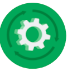
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



# Conclusion, Recommendations, Next Steps

### Upon reviewing the group slides and the Jupyter notebook, it is noted that there might be some differences in the results. This could be due to the individual contributions made during the presentation preparation as a group of five. 

### To ensure consistency, it is recommended to cross-reference the findings from the Jupyter notebook with the information presented in the slides.